### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
import seaborn as sns
import math
import time
from wordcloud import WordCloud

from scipy.stats import norm
from scipy import stats
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, plot_precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.decomposition import NMF


from sklearn.naive_bayes import MultinomialNB

from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger')

from nltk.stem.snowball import SnowballStemmer

from sklearn.feature_extraction.text import TfidfVectorizer

!pip install pyLDAvis
import pyLDAvis.sklearn
from sklearn.decomposition import LatentDirichletAllocation

!pip install contractions
!pip install gensim
import gensim
from gensim import corpora

!pip install shap
import shap 

pd.options.display.float_format = "{:.2f}".format

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
hotel_df = pd.read_csv('/content/drive/MyDrive/almabetter/Unsupervised-ML/UnSupervised-ML-Zomato Restaurant Clustering and Sentiment Analysis/Data/Zomato Restaurant names and Metadata.csv')
review_df = pd.read_csv('/content/drive/MyDrive/almabetter/Unsupervised-ML/UnSupervised-ML-Zomato Restaurant Clustering and Sentiment Analysis/Data/Zomato Restaurant reviews.csv')

### Dataset First View

In [ ]:
hotel_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [ ]:
print(f'Total observation and feature for restaurant: {hotel_df.shape}')
print(f'Total observation and feature for review: {review_df.shape}')

Total observation and feature for restaurant: (105, 6)
Total observation and feature for review: (10000, 7)


### Dataset Information

In [ ]:
print('Restaurant Info')
print('\n')
hotel_df.info()
print('='*120)
print('\n')
print('Review Info')
print('\n')
review_df.info()

Restaurant Info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


Review Info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)

#### Duplicate Values

In [ ]:
print('For Restaurant')
print('\n')
print(f"Data is duplicated ? {hotel_df.duplicated().value_counts()},unique values with {len(hotel_df[hotel_df.duplicated()])} duplication")
print('\n')
print('='*120)
print('\n')
print('For Reviews')
print('\n')
print(f"Data is duplicated ? {review_df.duplicated().value_counts()},unique values with {len(review_df[review_df.duplicated()])} duplication")

For Restaurant


Data is duplicated ? False    105
dtype: int64,unique values with 0 duplication




For Reviews


Data is duplicated ? False    9964
True       36
dtype: int64,unique values with 36 duplication


In [ ]:
print(f' Duplicate data count = {review_df[review_df.duplicated()].shape[0]}')
review_df[review_df.duplicated()]

 Duplicate data count = 36


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8781,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8782,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8783,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8784,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8785,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8786,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8787,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
review_df[(review_df['Restaurant'] == 'American Wild Wings')].shape

(100, 7)

In [ ]:
review_df[(review_df['Restaurant'] == 'Arena Eleven')].shape

(100, 7)

#### Missing Values/Null Values

In [ ]:
hotel_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [ ]:
review_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

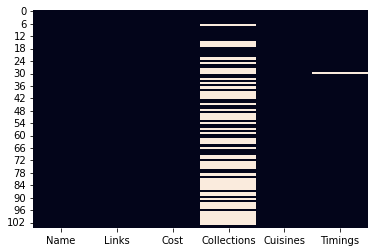

In [ ]:
sns.heatmap(hotel_df.isnull(), cbar=False);

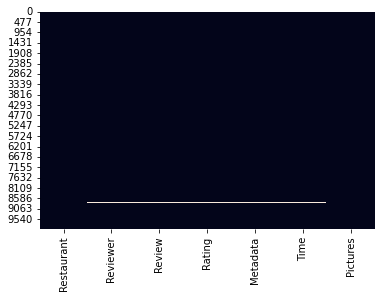

In [ ]:
sns.heatmap(review_df.isnull(), cbar=False);

### What did you know about your dataset?

**Restaurant DataSet**
* There are 105 total observation with 6 different features.
* Feature like collection and timing has null values.
* There is no duplicate values i.e., 105 unique data.
* Feature cost represent amount but has object data type because these values are separated by comma ','.
* Timing represent operational hour but as it is represented in the form of text has object data type.

**Review DataSet**
* There are total 10000 observation and 7 features.
* Except picture and restaurant feature all others have null values.
* There are total of 36 duplicate values for two restaurant - American Wild Wings and Arena Eleven, where all these duplicate values generally have null values.
* Rating represent ordinal data, has object data type should be integer.
* Timing represent the time when review was posted but show object data time, it should be converted into date time.


## ***2. Understanding Your Variables***

In [ ]:
print(f'Features : {hotel_df.columns.to_list()}')

Features : ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']


In [ ]:
print(f'Features : {review_df.columns.to_list()}')

Features : ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [ ]:
hotel_df.describe().T

,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


In [ ]:
review_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Restaurant,10000,100,Beyond Flavours,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reviewer,9962,7446,Parijat Ray,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Review,9955,9364,good,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9962,10,5,3832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metadata,9962,2477,1 Review,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,9962,9782,7/29/2018 20:34,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pictures,10000.00,NaN,NaN,NaN,0.75,2.57,0.00,0.00,0.00,0.00,64.00


### Variables Description 

**Attributes ▶**

---
**Zomato Restaurant**
* Name : Name of Restaurants

* Links : URL Links of Restaurants

* Cost : Per person estimated Cost of dining

* Collection : Tagging of Restaurants w.r.t. Zomato categories

* Cuisines : Cuisines served by Restaurants

* Timings : Restaurant Timings

**Zomato Restaurant Reviews**
* Restaurant : Name of the Restaurant

* Reviewer : Name of the Reviewer

* Review : Review Text

* Rating : Rating Provided by Reviewer

* MetaData : Reviewer Metadata - No. of Reviews and followers

* Time: Date and Time of Review

* Pictures : No. of pictures posted with review





### Check Unique Values for each variable.

In [ ]:
for i in hotel_df.columns.tolist():
  print("No. of unique values in ",i,"is",hotel_df[i].nunique(),".")

No. of unique values in  Name is 105 .
No. of unique values in  Links is 105 .
No. of unique values in  Cost is 29 .
No. of unique values in  Collections is 42 .
No. of unique values in  Cuisines is 92 .
No. of unique values in  Timings is 77 .


In [ ]:
for i in review_df.columns.tolist():
  print("No. of unique values in ",i,"is",review_df[i].nunique(),".")

No. of unique values in  Restaurant is 100 .
No. of unique values in  Reviewer is 7446 .
No. of unique values in  Review is 9364 .
No. of unique values in  Rating is 10 .
No. of unique values in  Metadata is 2477 .
No. of unique values in  Time is 9782 .
No. of unique values in  Pictures is 36 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
hotel = hotel_df.copy()
review = review_df.copy()

####Restaurant

In [ ]:
hotel['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [ ]:
hotel['Cost'] = hotel['Cost'].str.replace(",","").astype('int64')

In [ ]:
hotel.sort_values('Cost', ascending = False)[['Name','Cost']][:5]

,Name,Cost
92,Collage - Hyatt Hyderabad Gachibowli,2800
56,Feast - Sheraton Hyderabad Hotel,2500
21,Jonathan's Kitchen - Holiday Inn Express & Suites,1900
18,10 Downing Street,1900
91,Cascade - Radisson Hyderabad Hitec City,1800


In [ ]:
hotel.sort_values('Cost', ascending = False)[['Name','Cost']][-5:]

,Name,Cost
85,Momos Delight,200
29,Hunger Maggi Point,200
101,Sweet Basket,200
89,Mohammedia Shawarma,150
23,Amul,150


In [ ]:
hotel_dict = {}
amount = hotel.Cost.values.tolist() 

for price in amount:
      rows = hotel[hotel['Cost'] == price]
    hotel_dict[price] = rows["Name"].tolist()

same_price_hotel_df=pd.DataFrame.from_dict([hotel_dict]).transpose().reset_index().rename(
    columns={'index':'Cost',0:'Name of Restaurants'})

hotel_count = hotel.groupby('Cost')['Name'].count().reset_index().sort_values(
    'Cost', ascending = False)

same_price_hotel_df = same_price_hotel_df.merge(hotel_count, how = 'inner', 
                        on = 'Cost').rename(columns = {'Name':'Total_Restaurant'})
same_price_hotel_df.sort_values('Total_Restaurant', ascending = False)[:5]

,Cost,Name of Restaurants,Total_Restaurant
4,500,"[eat.fit, KFC, Kritunga Restaurant, Karachi Ba...",13
17,600,"[Behrouz Biryani, Karachi Cafe, Hyderabad Chef...",10
20,700,"[Marsala Food Company, Green Bawarchi Restaura...",8
2,1200,"[Over The Moon Brew Company, The Glass Onion, ...",7
8,400,"[Sardarji's Chaats & More, Hotel Zara Hi-Fi, P...",6


In [ ]:
same_price_hotel_df.sort_values('Cost', ascending = False)[:5]

,Cost,Name of Restaurants,Total_Restaurant
26,2800,[Collage - Hyatt Hyderabad Gachibowli],1
22,2500,[Feast - Sheraton Hyderabad Hotel],1
12,1900,"[10 Downing Street, Jonathan's Kitchen - Holid...",2
25,1800,[Cascade - Radisson Hyderabad Hitec City],1
27,1750,[Zega - Sheraton Hyderabad Hotel],1


In [ ]:
cuisine_value_list = hotel.Cuisines.str.split(', ')

In [ ]:
cuisine_dict = {}
for cuisine_names in cuisine_value_list:
    for cuisine in cuisine_names:
        if (cuisine in cuisine_dict):
            cuisine_dict[cuisine]+=1
        else:  
            cuisine_dict[cuisine]=1 

In [ ]:
cuisine_df=pd.DataFrame.from_dict([cuisine_dict]).transpose().reset_index().rename(
    columns={'index':'Cuisine',0:'Number of Restaurants'})

In [ ]:
cuisine_df.sort_values('Number of Restaurants', ascending =False)[:5]

,Cuisine,Number of Restaurants
5,North Indian,61
0,Chinese,43
1,Continental,21
6,Biryani,16
18,Fast Food,15


In [ ]:
Collections_value_list = hotel.Collections.dropna().str.split(', ')

In [ ]:
Collections_dict = {}
for collection in Collections_value_list:
    for col_name in collection:
        if (col_name in Collections_dict):
            Collections_dict[col_name]+=1
        else:  
            Collections_dict[col_name]=1 

In [ ]:
Collections_df=pd.DataFrame.from_dict([Collections_dict]).transpose().reset_index().rename(
    columns={'index':'Tags',0:'Number of Restaurants'})

In [ ]:
Collections_df.sort_values('Number of Restaurants', ascending =False)[:5]

,Tags,Number of Restaurants
2,Great Buffets,11
0,Food Hygiene Rated Restaurants in Hyderabad,8
5,Live Sports Screenings,7
6,Hyderabad's Hottest,7
1,Corporate Favorites,6


####Reviews

In [ ]:
review.Rating.value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [ ]:
review.loc[review['Rating'] == 'Like'] = 0
review['Rating'] = review['Rating'].astype('float')

In [ ]:
review.loc[review['Rating'] == 0] = review.Rating.median()

In [ ]:
review['Reviewer_Total_Review'],review['Reviewer_Followers']=review['Metadata'].str.split(',').str
review['Reviewer_Total_Review'] = pd.to_numeric(review['Reviewer_Total_Review'].str.split(' ').str[0])
review['Reviewer_Followers'] = pd.to_numeric(review['Reviewer_Followers'].str.split(' ').str[1])
review['Time']=pd.to_datetime(review['Time'])
review['Review_Year'] = pd.DatetimeIndex(review['Time']).year
review['Review_Month'] = pd.DatetimeIndex(review['Time']).month
review['Review_Hour'] = pd.DatetimeIndex(review['Time']).hour

In [ ]:
avg_hotel_rating = review.groupby('Restaurant').agg({'Rating':'mean',
        'Reviewer': 'count'}).reset_index().rename(columns = {'Reviewer': 'Total_Review'})
avg_hotel_rating

,Restaurant,Rating,Total_Review
0,4.00,4.00,1
1,10 Downing Street,3.80,100
2,13 Dhaba,3.48,100
3,"3B's - Buddies, Bar & Barbecue",4.76,100
4,AB's - Absolute Barbecues,4.88,100
...,...,...,...
96,Urban Asia - Kitchen & Bar,3.65,100
97,Yum Yum Tree - The Arabian Food Court,3.56,100
98,Zega - Sheraton Hyderabad Hotel,4.45,100
99,Zing's Northeast Kitchen,3.65,100


In [ ]:
review[review['Restaurant'] == 4.0]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers,Review_Year,Review_Month,Review_Hour
7601,4.00,4.00,4.00,4.00,4.00,1970-01-01 00:00:00.000000004,4,NaN,NaN,1970.00,1.00,0.00


In [ ]:
review.Restaurant.nunique()

101

In [ ]:
hotel_without_review = [name for name in hotel.Name.unique().tolist() 
       if name not in review.Restaurant.unique().tolist()]
hotel_without_review

['IndiBlaze',
 'Sweet Basket',
 'Angaara Counts 3',
 'Wich Please',
 'Republic Of Noodles - Lemon Tree Hotel']

In [ ]:
avg_hotel_rating.sort_values('Rating', ascending = False)[:5]

,Restaurant,Rating,Total_Review
4,AB's - Absolute Barbecues,4.88,100
12,B-Dubs,4.81,100
3,"3B's - Buddies, Bar & Barbecue",4.76,100
68,Paradise,4.70,100
36,Flechazo,4.66,100


In [ ]:
avg_hotel_rating.sort_values('Rating', ascending = True)[:5]

,Restaurant,Rating,Total_Review
42,Hotel Zara Hi-Fi,2.40,100
11,Asian Meal Box,2.58,100
67,Pakwaan Grand,2.71,100
58,Mathura Vilas,2.82,100
15,Behrouz Biryani,2.83,100


In [ ]:
most_followed_reviewer = review.groupby('Reviewer').agg({'Reviewer_Total_Review':'max',
      'Reviewer_Followers':'max', 'Rating':'mean'}).reset_index().rename(columns = {
          'Rating':'Average_Rating_Given'}).sort_values('Reviewer_Followers', ascending = False)
most_followed_reviewer[:5]

,Reviewer,Reviewer_Total_Review,Reviewer_Followers,Average_Rating_Given
5464,Satwinder Singh,186.00,13410.00,3.67
1702,Eat_vth_me,60.00,13320.00,5.00
5236,Samar Sardar,8.00,11329.00,3.50
1788,Foodies Hyderabad,31.00,9494.00,4.50
6230,Srinivas,34.00,7628.00,3.71


In [ ]:
hotel_year = review.groupby('Review_Year')['Restaurant'].apply(lambda x: x.tolist()).reset_index()
hotel_year['Count']= hotel_year['Restaurant'].apply(lambda x: len(x))
hotel_year

,Review_Year,Restaurant,Count
0,1970.00,[4.0],1
1,2016.00,"[Labonel, Labonel, Labonel, Labonel, Labonel, ...",43
2,2017.00,"[KS Bakers, KS Bakers, KS Bakers, KS Bakers, K...",213
3,2018.00,"[Shah Ghouse Spl Shawarma, Shah Ghouse Spl Sha...",4903
4,2019.00,"[Beyond Flavours, Beyond Flavours, Beyond Flav...",4802


In [ ]:
hotel = hotel.rename(columns = {'Name':'Restaurant'})
merged = hotel.merge(review, on = 'Restaurant')
merged.shape

(9999, 17)

In [ ]:
price_point = merged.groupby('Restaurant').agg({'Rating':'mean',
        'Cost': 'mean'}).reset_index().rename(columns = {'Cost': 'Price_Point'})


In [ ]:
price_point.sort_values('Rating',ascending = False)[:5]

,Restaurant,Rating,Price_Point
3,AB's - Absolute Barbecues,4.88,1500.00
11,B-Dubs,4.81,1600.00
2,"3B's - Buddies, Bar & Barbecue",4.76,1100.00
67,Paradise,4.70,800.00
35,Flechazo,4.66,1300.00


In [ ]:
price_point.sort_values('Rating',ascending = True)[:5]

,Restaurant,Rating,Price_Point
41,Hotel Zara Hi-Fi,2.40,400.00
10,Asian Meal Box,2.58,200.00
66,Pakwaan Grand,2.71,400.00
57,Mathura Vilas,2.82,500.00
14,Behrouz Biryani,2.83,600.00


In [ ]:
rating_count_df = pd.DataFrame(review.groupby('Reviewer').size(), columns=[
                                                                "Rating_Count"])
rating_count_df.sort_values('Rating_Count', ascending = False)[:5]

,Rating_Count
Reviewer,
Parijat Ray,13
Ankita,13
Kiran,12
Vedant Killa,11
Jay Mehta,11


#### Chart - 1 Distplot for Distribution

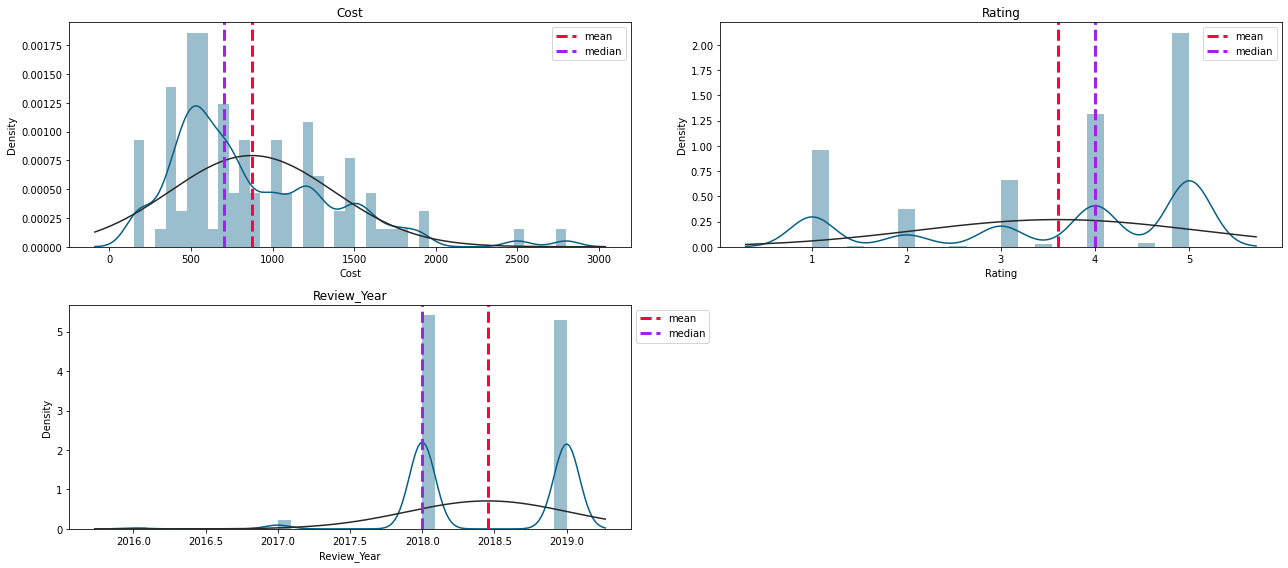

In [ ]:
plt.figure(figsize = (18,8));
for i,col in enumerate(['Cost','Rating','Review_Year']) :
       plt.subplot(2,2,i+1);
    sns.distplot(merged[col], color = '#055E85', fit = norm);
    feature = merged[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1), loc = 'up')
    plt.title(f'{col.title()}');
    plt.tight_layout();

#### Chart - 2 Maximum Engagement and Lowest Engagement

In [ ]:
most_engaged_hotel = price_point.sort_values('Rating', ascending = False)

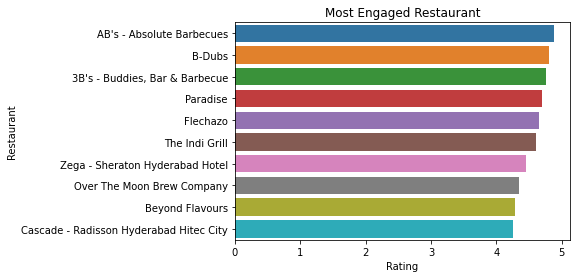

In [ ]:
sns.barplot(data = most_engaged_hotel[:10], x = 'Rating', y = 'Restaurant')
plt.title('Most Engaged Restaurant')
plt.show()

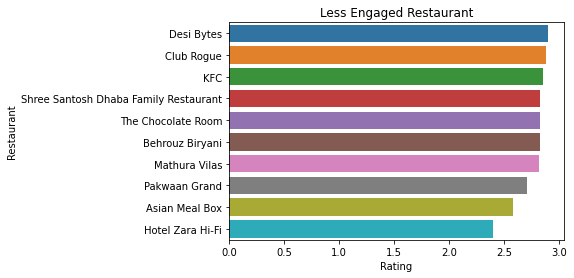

In [ ]:
sns.barplot(data = most_engaged_hotel[-10:], x = 'Rating', y = 'Restaurant')
plt.title('Less Engaged Restaurant')
plt.show()

#### Chart - 3 Price Point for High Rated and Low Rated Hotels

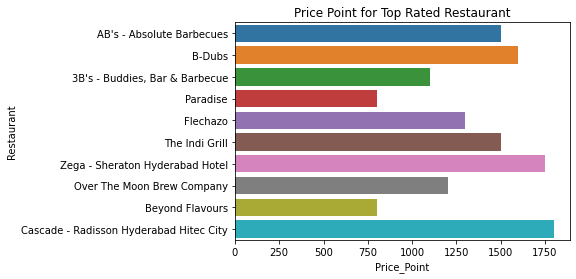

In [ ]:
sns.barplot(data = most_engaged_hotel[:10], x = 'Price_Point', y = 'Restaurant')
plt.title('Price Point for Top Rated Restaurant')
plt.show()

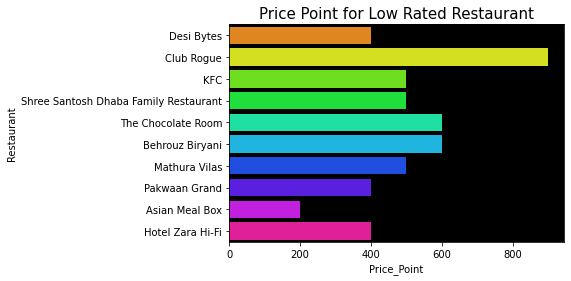

In [ ]:
sns.barplot(data = most_engaged_hotel[-10:], x = 'Price_Point', 
            y = 'Restaurant',palette = 'hsv')
plt.title('Price Point for Low Rated Restaurant', size = 15)

ax = plt.axes()
ax.set_facecolor("black")
plt.show()

#### Chart - 4 Proportion of Cuisine Sold by Most Restaurant

In [ ]:

cuisine_list = cuisine_df.sort_values('Number of Restaurants', ascending = False)['Cuisine'].tolist()[:5]

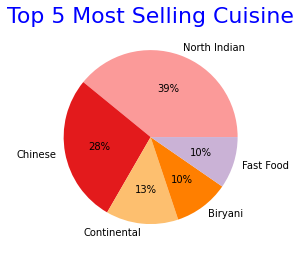

In [ ]:
data = cuisine_df.sort_values('Number of Restaurants', ascending = False)[
    'Number of Restaurants'].tolist()[:5]
labels = cuisine_list

colors = sns.color_palette('Paired')[4:9]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Top 5 Most Selling Cuisine', size =22, color= 'blue')
plt.show()

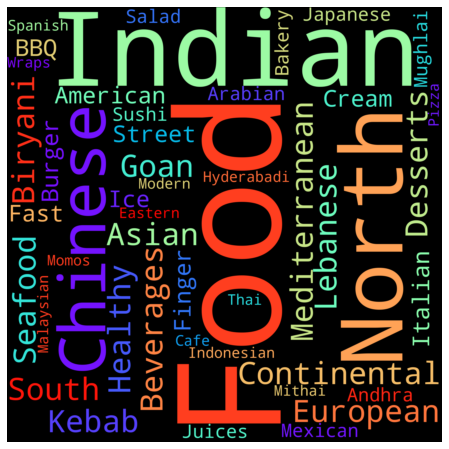

In [ ]:
plt.figure(figsize=(15,8))
text = " ".join(name for name in cuisine_df.Cuisine )



word_cloud = WordCloud(width = 2000, height = 2000,collocations = False,
                       colormap='rainbow',background_color = 'black').generate(text)

plt.imshow(word_cloud, interpolation='bilinear');

plt.axis("off");

#### Chart - 5 Most used Tags

In [ ]:
collection_list = Collections_df.sort_values('Number of Restaurants', 
                          ascending = False)['Tags'].tolist()[:5]

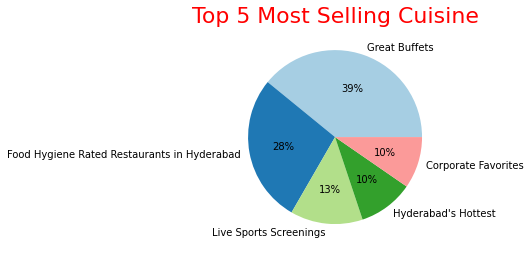

In [ ]:
data = cuisine_df.sort_values('Number of Restaurants', ascending = False)[
    'Number of Restaurants'].tolist()[:5]
labels = collection_list

colors = sns.color_palette('Paired')[:5]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Top 5 Most Selling Cuisine', size =22, color= 'red')
plt.show()

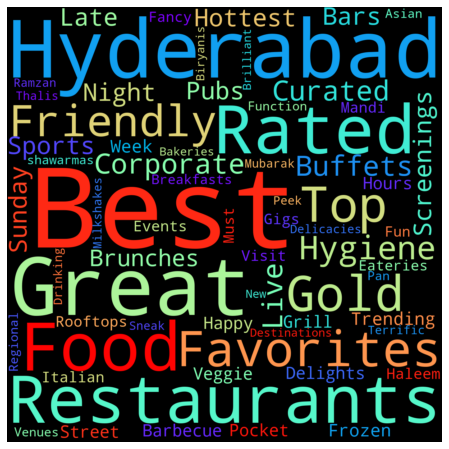

In [ ]:
plt.figure(figsize=(15,8))
text = " ".join(name for name in Collections_df.Tags )



word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, 
                      colormap='rainbow', background_color = 'black').generate(text)


plt.imshow(word_cloud, interpolation='bilinear');

plt.axis("off");

#### Chart - 6 Learn about Reviewers

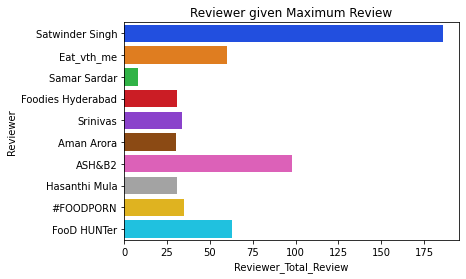

In [ ]:
sns.barplot(data = most_followed_reviewer[:10], x = 'Reviewer_Total_Review',
            y = 'Reviewer', palette='bright')
plt.title('Reviewer given Maximum Review')
plt.show()

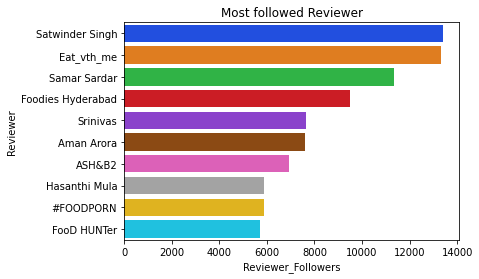

In [ ]:
sns.barplot(data = most_followed_reviewer[:10], x = 'Reviewer_Followers', 
            y = 'Reviewer',palette='bright')
plt.title('Most followed Reviewer')
plt.show()

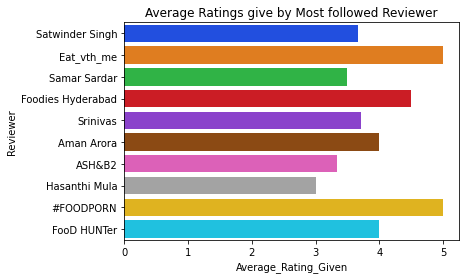

In [ ]:
sns.barplot(data = most_followed_reviewer[:10], x = 'Average_Rating_Given', 
            y = 'Reviewer',palette='bright')
plt.title('Average Ratings give by Most followed Reviewer')
plt.show()

#### Chart - 7 Hotel with Highest Price and Lowest Price

In [ ]:

price_of_hotel = hotel.sort_values('Cost', ascending = False)[['Restaurant','Cost']]

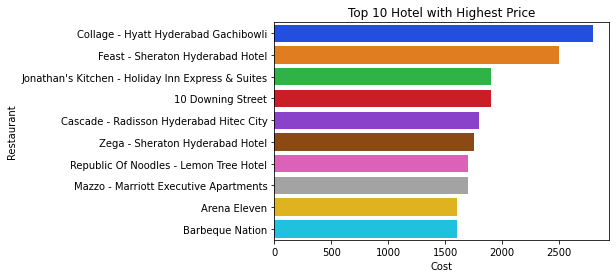

In [ ]:
sns.barplot(data = price_of_hotel[:10], x = "Cost", y='Restaurant', palette = 'bright')
plt.title('Top 10 Hotel with Highest Price')
plt.show()

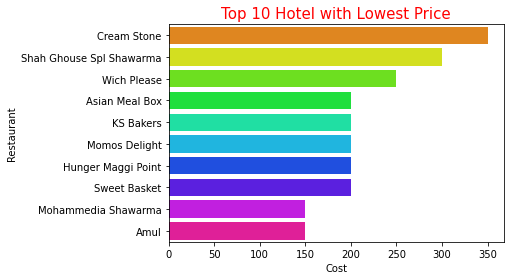

In [ ]:
sns.barplot(data = price_of_hotel[-10:], x = "Cost", y='Restaurant', palette = 'hsv')
plt.title('Top 10 Hotel with Lowest Price', size =15, color = 'red')
plt.show()

In [ ]:
expected_revenue = avg_hotel_rating.merge(hotel[['Restaurant','Cost']], on = 'Restaurant')

expected_revenue['Expected_Revenue'] = expected_revenue['Total_Review'] * expected_revenue['Cost']


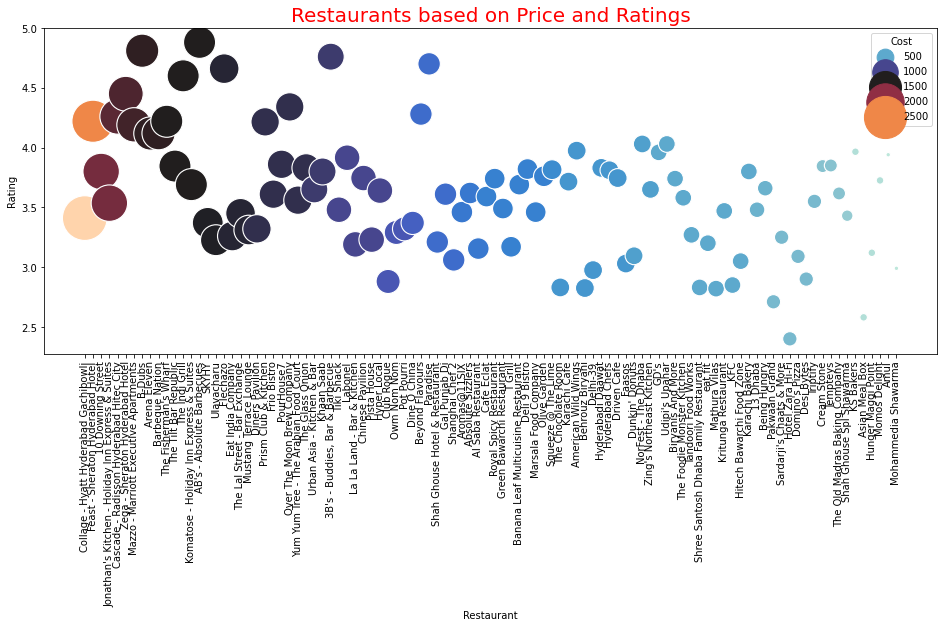

In [ ]:
plt.figure(figsize=(16,6))
data = expected_revenue.sort_values('Cost', ascending  = False)
sns.scatterplot(data= data, x= "Restaurant", y="Rating", size="Cost", 
                hue = 'Cost',legend=True, sizes=(20, 2000),palette ="icefire")
plt.xticks(rotation=90)
plt.title('Restaurants based on Price and Ratings',size=20,color = 'red')
plt.show()

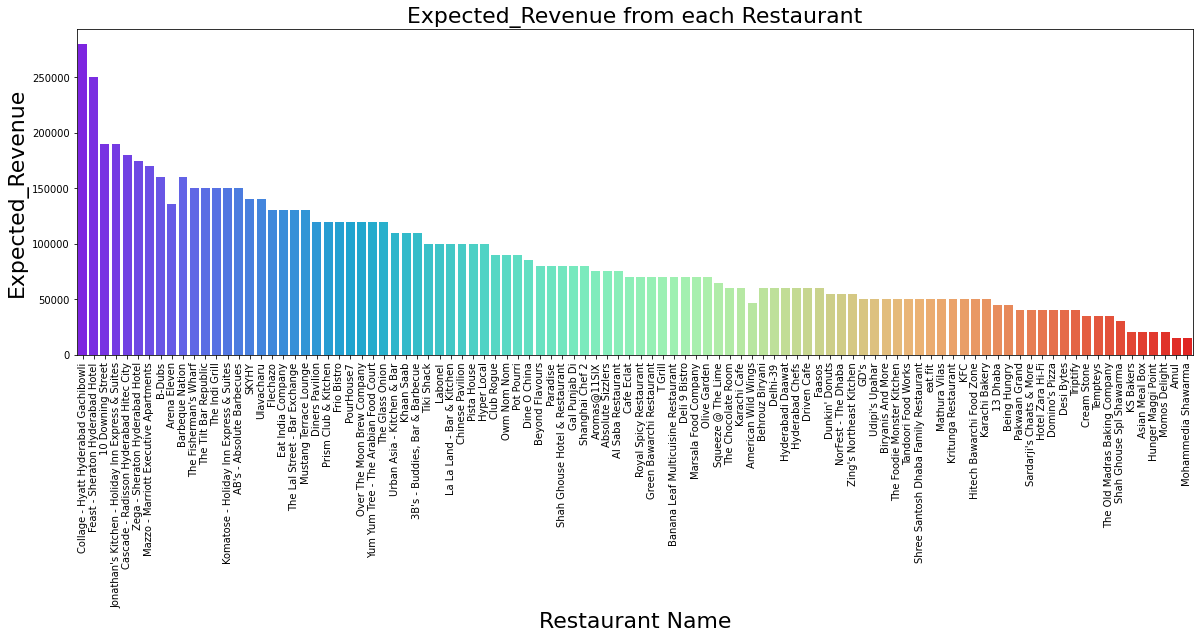

In [ ]:
fig = plt.figure(figsize=[20,6])
sns.barplot(data= data, x='Restaurant', y= 'Expected_Revenue', palette ="rainbow")
plt.title("Expected_Revenue from each Restaurant", size = 22)
plt.xlabel('Restaurant Name', size = 22)
plt.xticks(rotation=90)
plt.ylabel('Expected_Revenue', size = 22)
plt.show()

### Chart - 8 - Correlation Heatmap

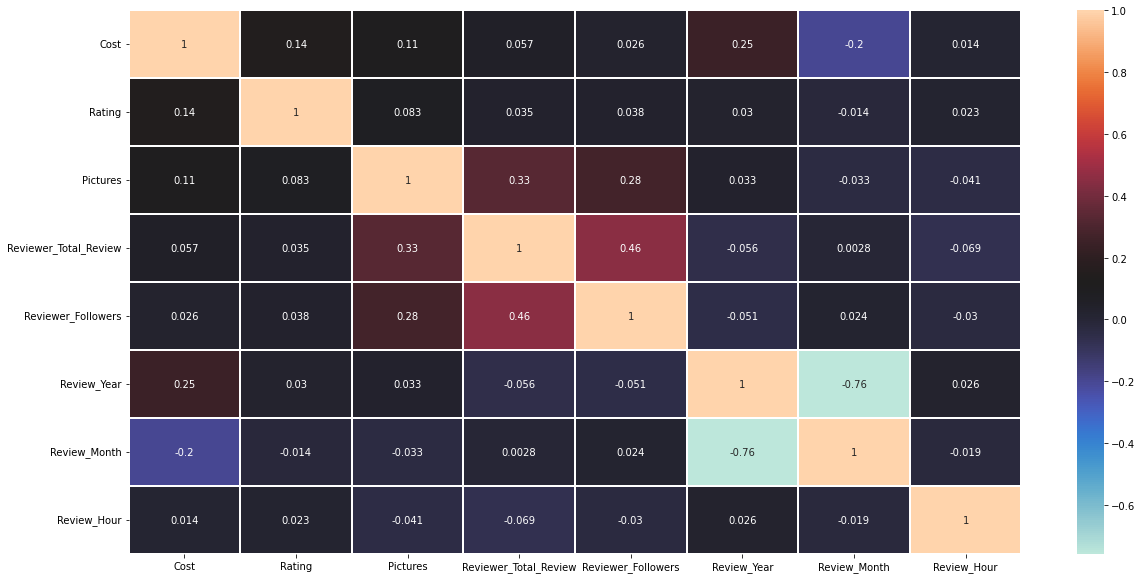

In [ ]:
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(merged.corr(),ax = ax, annot=True, cmap = 'icefire', linewidths = 1)

plt.show()

### Chart - 9 - Pair Plot 

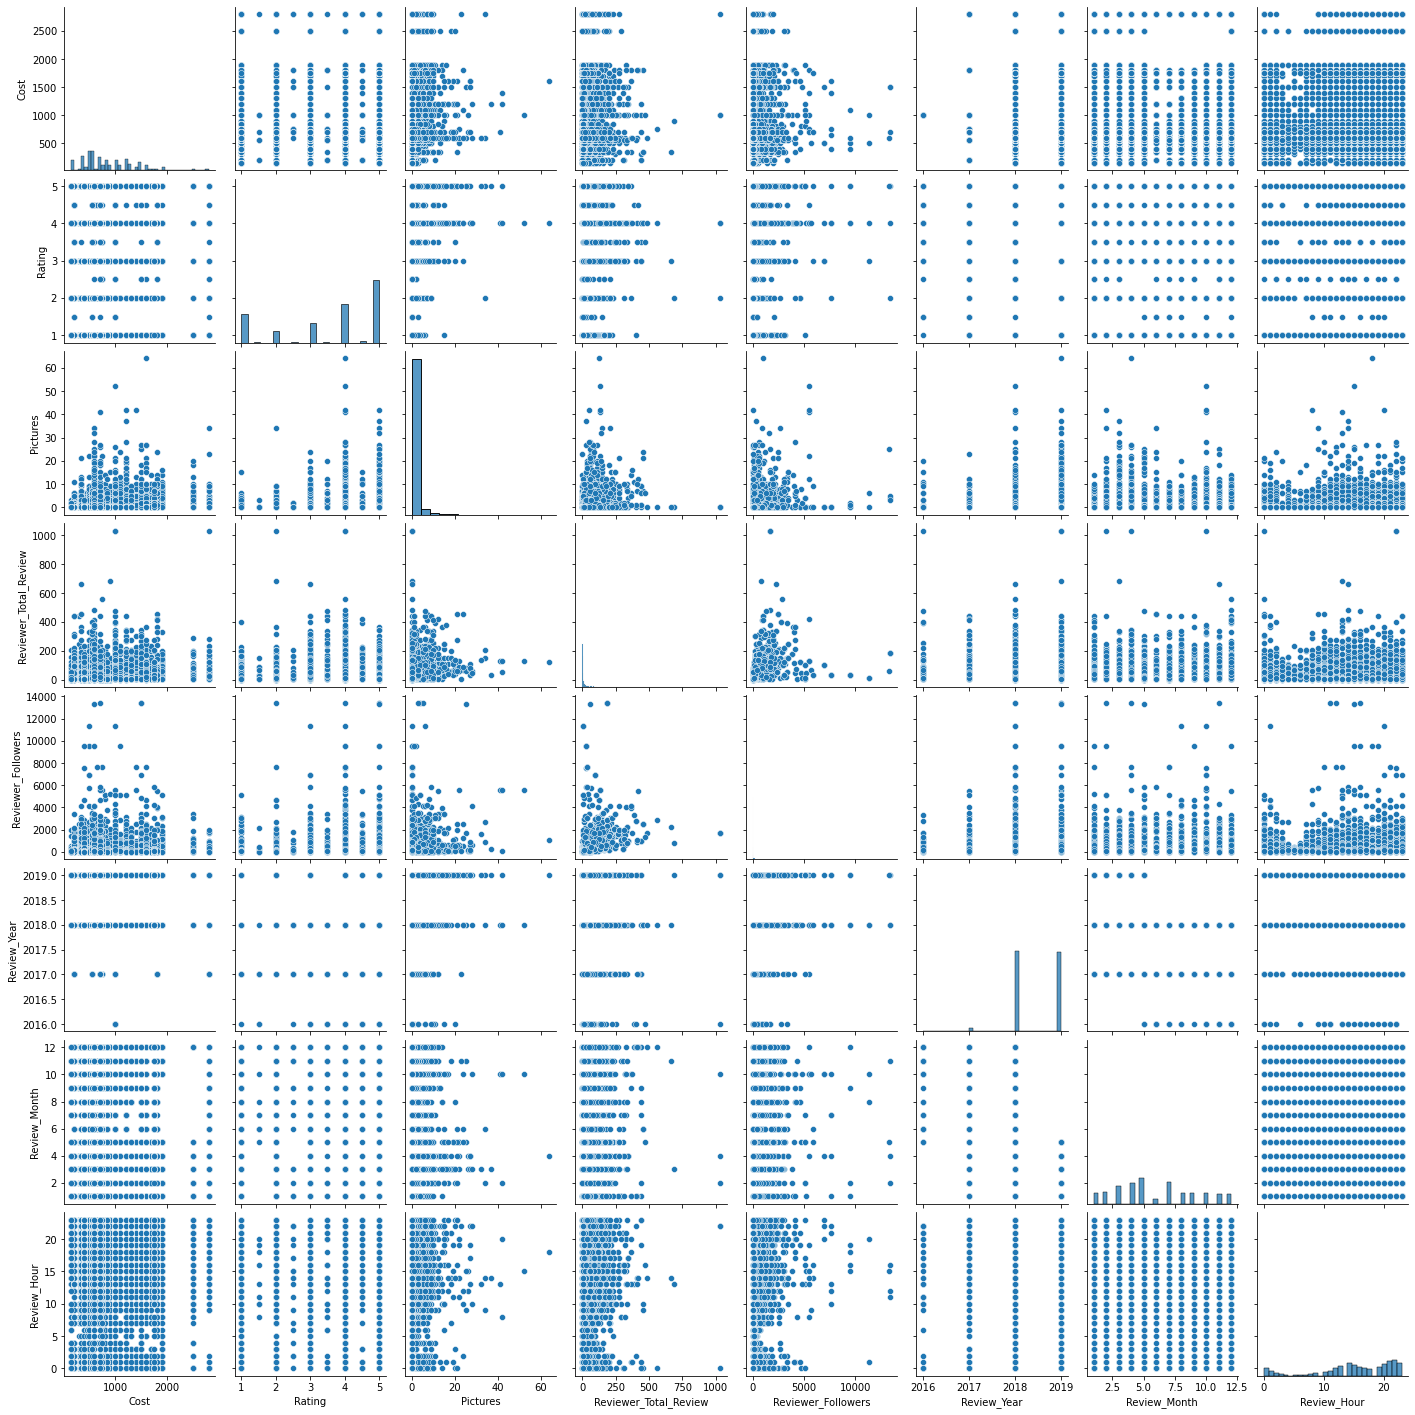

In [ ]:
sns.pairplot(merged);

#### 2. Perform an appropriate statistical test.

In [ ]:
import statsmodels.formula.api as smf


model = smf.ols(formula='Rating ~ Cost', data= merged).fit()

p_value = model.pvalues[1]
if p_value < 0.05:
    print("Reject Null Hypothesis - There is no relationship between the cost of\
 restaurant and the rating it receives.")
else:
    print("Fail to reject Null Hypothesis - There is a positive relationship \
 between the cost of a restaurant and the rating it receives.")

Reject Null Hypothesis - There is no relationship between the cost of restaurant and the rating it receives.


#### 2. Perform an appropriate statistical test.

In [ ]:
import statsmodels.formula.api as smf


model = smf.ols(formula='Rating ~ Reviewer_Followers', data = merged).fit()


p_value = model.pvalues[1]

if p_value < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")


Reject Null Hypothesis


#### 2. Perform an appropriate statistical test.

In [ ]:
pd.crosstab(merged['Cuisines'], merged['Rating'])[:1]

Rating,1.00,1.50,2.00,2.50,3.00,3.50,4.00,4.50,5.00
Cuisines,,,,,,,,,
American,1,0,1,0,2,0,8,0,88


In [ ]:
from scipy.stats import chi2_contingency

ct = pd.crosstab(merged['Cuisines'], merged['Rating'])

chi2, p, dof, expected = chi2_contingency(ct)

if p < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [ ]:
review = review.drop_duplicates()

In [ ]:
print(f"Anymore duplicate left ? {review.duplicated().value_counts()}, unique values with {len(review[review.duplicated()])} duplication")

Anymore duplicate left ? False    9964
dtype: int64, unique values with 0 duplication


####Treating Missing Values

Restaurant Dataset

---



In [ ]:
hotel.isnull().sum()

Restaurant      0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [ ]:
hotel[hotel['Timings'].isnull()]

,Restaurant,Links,Cost,Collections,Cuisines,Timings
30,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,NaN,"Andhra, South Indian, North Indian",NaN


In [ ]:
hotel.Timings.fillna(hotel.Timings.mode()[0], inplace = True)

In [ ]:
missing_percentage = ((hotel['Collections'].isnull().sum())/(len(hotel['Collections'])))*100
print(f'Percentage of missing value in Collections is {round(missing_percentage, 2)}%')

Percentage of missing value in Collections is 51.43%


In [ ]:
hotel.drop('Collections', axis = 1, inplace = True)

In [ ]:
hotel.isnull().sum()

Restaurant    0
Links         0
Cost          0
Cuisines      0
Timings       0
dtype: int64



---

Review Dataset

In [ ]:
review.isnull().sum()

Restaurant                  0
Reviewer                    2
Review                      9
Rating                      2
Metadata                    2
Time                        2
Pictures                    0
Reviewer_Total_Review       3
Reviewer_Followers       1581
Review_Year                 2
Review_Month                2
Review_Hour                 2
dtype: int64

In [ ]:
review[review['Reviewer'].isnull()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers,Review_Year,Review_Month,Review_Hour
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN
9085,Arena Eleven,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
review[review['Reviewer_Total_Review'].isnull()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers,Review_Year,Review_Month,Review_Hour
7601,4.00,4.00,4.00,4.00,4.00,1970-01-01 00:00:00.000000004,4,NaN,NaN,1970.00,1.00,0.00
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN
9085,Arena Eleven,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
review = review.dropna(subset=['Reviewer','Reviewer_Total_Review'])

In [ ]:
null_counts = [(x, a) for x, a in review.isnull().sum().items() if a > 0]

null_counts

[('Review', 7), ('Reviewer_Followers', 1578)]

In [ ]:
review = review.fillna({"Review": "No Review", "Reviewer_Followers": 0})

In [ ]:
review.isnull().sum()

Restaurant               0
Reviewer                 0
Review                   0
Rating                   0
Metadata                 0
Time                     0
Pictures                 0
Reviewer_Total_Review    0
Reviewer_Followers       0
Review_Year              0
Review_Month             0
Review_Hour              0
dtype: int64

In [ ]:
merged = hotel.merge(review, on = 'Restaurant')
merged.shape

(9961, 16)

In [ ]:

from sklearn.ensemble import IsolationForest

print("Skewness - Cost: %f" % merged['Cost'].skew())
print("Kurtosis - Cost: %f" % merged['Cost'].kurt())
print("Skewness - Reviewer_Followers: %f" % merged['Reviewer_Followers'].skew())
print("Kurtosis - Reviewer_Followers: %f" % merged['Reviewer_Followers'].kurt())

Skewness - Cost: 1.153637
Kurtosis - Cost: 1.571590
Skewness - Reviewer_Followers: 10.092703
Kurtosis - Reviewer_Followers: 151.312960


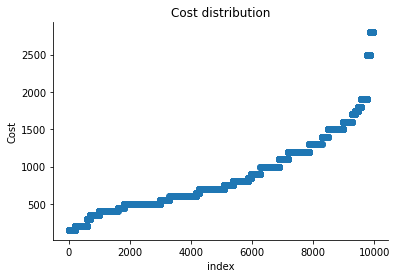

In [ ]:

plt.scatter(range(merged.shape[0]), np.sort(merged['Cost'].values))
plt.xlabel('index')
plt.ylabel('Cost')
plt.title("Cost distribution")
sns.despine()


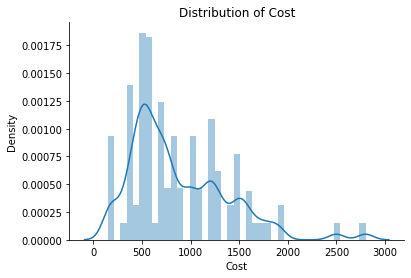

In [ ]:
sns.distplot(merged['Cost'])
plt.title("Distribution of Cost")
sns.despine()

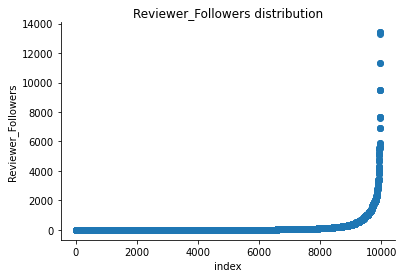

In [ ]:
plt.scatter(range(merged.shape[0]), np.sort(merged['Reviewer_Followers'].values))
plt.xlabel('index')
plt.ylabel('Reviewer_Followers')
plt.title("Reviewer_Followers distribution")
sns.despine()

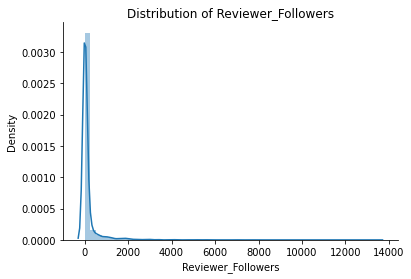

In [ ]:
sns.distplot(merged['Reviewer_Followers'])
plt.title("Distribution of Reviewer_Followers")
sns.despine()

In [ ]:
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(merged['Cost'].values.reshape(-1, 1))
merged['anomaly_score_univariate_Cost'] = isolation_forest.decision_function(merged['Cost'].values.reshape(-1, 1))
merged['outlier_univariate_Cost'] = isolation_forest.predict(merged['Cost'].values.reshape(-1, 1))

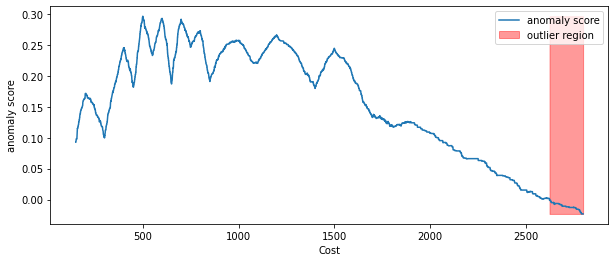

In [ ]:
xx = np.linspace(merged['Cost'].min(), merged['Cost'].max(), len(merged)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Cost')
plt.show();

In [ ]:
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(merged['Reviewer_Followers'].values.reshape(-1, 1))
merged['anomaly_score_univariate_follower'] = isolation_forest.decision_function(
    merged['Reviewer_Followers'].values.reshape(-1, 1))
merged['outlier_univariate_follower'] = isolation_forest.predict(
    merged['Reviewer_Followers'].values.reshape(-1, 1))


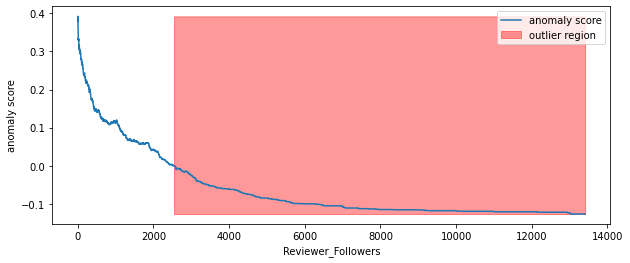

In [ ]:
xx = np.linspace(merged['Reviewer_Followers'].min(), merged['Reviewer_Followers'].max(), len(merged)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Reviewer_Followers')
plt.show();

####Treating Outlier

In [ ]:
symmetric_feature=[]
non_symmetric_feature=[]
for i in merged.describe().columns:
  if abs(merged[i].mean()-merged[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

print("Symmetric Distributed Features : -",symmetric_feature)

print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['anomaly_score_univariate_Cost', 'outlier_univariate_Cost', 'anomaly_score_univariate_follower', 'outlier_univariate_follower']
Skew Symmetric Distributed Features : - ['Cost', 'Rating', 'Pictures', 'Reviewer_Total_Review', 'Reviewer_Followers', 'Review_Year', 'Review_Month', 'Review_Hour']


In [ ]:
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)- 1.5*IQR
  upper_bridge =df[feature].quantile(0.75)+ 1.5*IQR
  return upper_bridge,lower_bridge

In [ ]:
hotel.loc[hotel['Cost']<= outlier_treatment_skew(df=hotel,
  feature='Cost')[1], 'Cost']=outlier_treatment_skew(df=hotel,feature='Cost')[1]

hotel.loc[hotel['Cost']>= outlier_treatment_skew(df=hotel,
  feature='Cost')[0], 'Cost']=outlier_treatment_skew(df=hotel,feature='Cost')[0]

In [ ]:
review.loc[review['Reviewer_Followers']<= outlier_treatment_skew(df=review,
  feature='Reviewer_Followers')[1], 'Reviewer_Followers']=outlier_treatment_skew(
      df=review,feature='Reviewer_Followers')[1]

review.loc[review['Reviewer_Followers']>= outlier_treatment_skew(df=review,
  feature='Reviewer_Followers')[0], 'Reviewer_Followers']=outlier_treatment_skew(
      df=review,feature='Reviewer_Followers')[0]

In [ ]:
merged.drop(columns =['anomaly_score_univariate_Cost','outlier_univariate_Cost',
  'anomaly_score_univariate_follower','outlier_univariate_follower'], inplace = True)

### 3. Categorical Encoding

In [ ]:
cluster_dummy = hotel[['Restaurant','Cuisines']]

cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].str.split(',')

cluster_dummy = cluster_dummy.explode('Cuisines')

cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].apply(lambda x: x.strip())
cluster_dummy = pd.get_dummies(cluster_dummy, columns=["Cuisines"], prefix=["Cuisines"])

cluster_dummy.loc[:, cluster_dummy.columns.str.startswith('Cuisines_')].idxmax(1)[:6]


cluster_dummy.columns = cluster_dummy.columns.str.replace("Cuisines_","")

cluster_dummy = cluster_dummy.groupby("Restaurant").sum().reset_index()

In [ ]:

hotel['Total_Cuisine_Count'] = hotel['Cuisines'].apply(lambda x : len(x.split(',')))

In [ ]:
avg_hotel_rating.rename(columns = {'Rating':'Average_Rating'}, inplace =True)
hotel = hotel.merge(avg_hotel_rating[['Average_Rating','Restaurant']], on = 'Restaurant')
hotel.head(1)

,Restaurant,Links,Cost,Cuisines,Timings,Total_Cuisine_Count,Average_Rating
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,4.28


In [ ]:
cluster_dummy = hotel[['Restaurant','Cost','Average_Rating','Total_Cuisine_Count'
                      ]].merge(cluster_dummy, on = 'Restaurant')

In [ ]:
cluster_dummy.shape

(100, 48)



---

Alternate Method for creating dummies

In [ ]:
cluster_df = hotel[['Restaurant','Cuisines','Cost','Average_Rating','Total_Cuisine_Count']]

In [ ]:
cluster_df = pd.concat([cluster_df,pd.DataFrame(columns=list(cuisine_dict.keys()))])

In [ ]:

for i, row in cluster_df.iterrows():
 
  for column in list(cluster_df.columns):
      if column not in ['Restaurant','Cost','Cuisines','Average_Rating','Total_Cuisine_Count']:
     
        if column in row['Cuisines']:
      
          cluster_df.loc[i,column] = 1
        else:
          cluster_df.loc[i,column] = 0

In [ ]:
cluster_df.head(2).T

,0,1
Restaurant,Beyond Flavours,Paradise
Cuisines,"Chinese, Continental, Kebab, European, South I...","Biryani, North Indian, Chinese"
Cost,800.00,800.00
Average_Rating,4.28,4.70
Total_Cuisine_Count,6.00,3.00
Chinese,1,1
Continental,1,0
Kebab,1,0
European,1,0
South Indian,1,0


#### 1. Expand Contraction

In [ ]:
sentiment_df = review[['Reviewer','Restaurant','Rating','Review']]
sentiment_df.sample(2)

,Reviewer,Restaurant,Rating,Review
2501,Anshul Gupta,Tiki Shack,1.00,Everything since I entered the restaurant was ...
7349,Karan Dadure,Driven Cafe,3.00,The best thing about this cafe is that it is o...


In [ ]:
sentiment_df = sentiment_df.reset_index()
sentiment_df['index'] = sentiment_df.index

In [ ]:
sentiment_df.sample(2)

,index,Reviewer,Restaurant,Rating,Review
126,126,Arko Guha,Paradise,5.00,"Very nice place to eat, great food and great s..."
8590,8590,Annu Priya,Momos Delight,4.00,Big fan of kurkure chicken momos served here. ...


In [ ]:
import contractions
sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:contractions.fix(x))

#### 2. Lower Casing

In [ ]:
sentiment_df['Review'] = sentiment_df['Review'].str.lower()

In [ ]:
sentiment_df.head()

,index,Reviewer,Restaurant,Rating,Review
0,0,Rusha Chakraborty,Beyond Flavours,5.00,"the ambience was good, food was quite good . h..."
1,1,Anusha Tirumalaneedi,Beyond Flavours,5.00,ambience is too good for a pleasant evening. s...
2,2,Ashok Shekhawat,Beyond Flavours,5.00,a must try.. great food great ambience. thnx f...
3,3,Swapnil Sarkar,Beyond Flavours,5.00,soumen das and arun was a great guy. only beca...
4,4,Dileep,Beyond Flavours,5.00,food is good.we ordered kodi drumsticks and ba...


#### 3. Removing Punctuations

In [ ]:
import string
def remove_punctuation(text):
  '''a function for removing punctuation'''

  translator = str.maketrans('', '', string.punctuation)
  return text.translate(translator)

In [ ]:
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_punctuation)
sentiment_df.sample(5)

,index,Reviewer,Restaurant,Rating,Review
1943,1943,Rahul Thati,Pakwaan Grand,3.00,i had ordered grilled chicken from pakwaan gra...
2273,2273,Raji Reddy,B-Dubs,5.00,ambience is good and well known for wings and ...
7989,7989,Kolla Divakar,Olive Garden,1.00,very bad taste
3386,3386,Sundeep Sethi,Club Rogue,1.00,the worst place in the city i was here for a f...
4574,4574,Jada Ravi,Owm Nom Nom,1.00,quantity of prawns are very very less in prawn...


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
import re

sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"http\S+", "", x))

sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"\d+", "", x))

In [ ]:
def get_location(link):
  link_elements = link.split("/")
  return link_elements[3]

hotel['Location'] = hotel['Links'].apply(get_location)
hotel.sample(2)

,Restaurant,Links,Cost,Cuisines,Timings,Total_Cuisine_Count,Average_Rating,Location
80,Tandoori Food Works,https://www.zomato.com/hyderabad/tandoori-food...,500,"North Indian, Burger, Kebab","12noon to 12midnight (Mon, Tue, Wed, Thu, Sun)...",3,3.27,hyderabad
14,AB's - Absolute Barbecues,https://www.zomato.com/hyderabad/abs-absolute-...,1500,"European, Mediterranean, North Indian","12 Noon to 4:30 PM, 6:30 PM to 11:30 PM",3,4.88,hyderabad


#### 5. Removing Stopwords & Removing White spaces

In [ ]:
sw = stopwords.words('english')

In [ ]:
def delete_stopwords(text):
  '''a function for removing the stopword'''
  text = [word.lower() for word in text.split() if word.lower() not in sw]
  return " ".join(text)

In [ ]:
sentiment_df['Review'] = sentiment_df['Review'].apply(delete_stopwords)

In [ ]:
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))

In [ ]:
sentiment_df.sample(2)

,index,Reviewer,Restaurant,Rating,Review
818,818,Thunderbird,Hyper Local,5.00,nice cozy place good ambience food also great ...
6067,6067,Anoop Raj,PourHouse7,3.00,visited place weekend chilling called asked da...


#### 6. Rephrase Text

* **Not using** as it was not giving result as expected.

In [ ]:
sentiment_df.sample(2)

,index,Reviewer,Restaurant,Rating,Review
5672,5672,Vinita More,Feast - Sheraton Hyderabad Hotel,3.00,went christmas buffet lunch us staff friendly ...
3161,3161,Venkatesh Mudiraj,Pista House,1.00,waste food ordered zafrani biryani cool think ...


#### 7. Tokenization

In [ ]:
sentiment_df['Review'] = sentiment_df['Review'].apply(nltk.word_tokenize)

In [ ]:
sentiment_df.sample(2)

,index,Reviewer,Restaurant,Rating,Review
257,257,Sreeja Kamishetty,Flechazo,5.00,"[wonderful, service, food, great, care, hamid,..."
5781,5781,Siddharth Pandey,Being Hungry,2.00,"[dal, really, bad, chinese, veg, manchurian, a..."


#### 8. Text Normalization

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize_tokens)


In [ ]:
sentiment_df.sample(2)

,index,Reviewer,Restaurant,Rating,Review
9555,9555,Yogesh Tiwari,Desi Bytes,5.00,"[perfect, food, joint, north, indian]"
6963,6963,Dipak Bachhav,The Indi Grill,5.00,"[food, awesome, tasty, 😊, staff, suvendu, raza..."


#### 10. Text Vectorization

**Tfidf**

---



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
vectorizer.fit(sentiment_df['Review'].values)
X_tfidf = vectorizer.transform(sentiment_df['Review'].values)



---

**Bag of Words**

In [ ]:
tokenized_text = []
for token in sentiment_df['Review']:
    tokenized_text.append(token)

tokens_dict = gensim.corpora.Dictionary(tokenized_text)


In [ ]:
texts_bow = [tokens_dict.doc2bow(text) for text in tokenized_text]

tokens = []
bow_values = []
doc_indices = []
doc_ids = []
for text_idx, text_bow in enumerate(texts_bow):
    for token_index, token_bow in text_bow:
        token = tokens_dict.get(token_index)
        tokens.append(token)
        bow_values.append(token_bow)
        doc_indices.append(text_idx)
        doc_ids.append(sentiment_df["Restaurant"][text_idx])

bow_dict = {"doc_index": doc_indices,
            "doc_id": doc_ids,
            "token": tokens,
            "bow": bow_values,
            }
bows_df = pd.DataFrame(bow_dict)
bows_df.head()

,doc_index,doc_id,token,bow
0,0,Beyond Flavours,also,1
1,0,Beyond Flavours,ambience,1
2,0,Beyond Flavours,brunch,1
3,0,Beyond Flavours,chill,1
4,0,Beyond Flavours,cost,1


### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

#####Restaurant

In [ ]:
hotel.shape

(100, 8)

In [ ]:
hotel.columns

Index(['Restaurant', 'Links', 'Cost', 'Cuisines', 'Timings',
       'Total_Cuisine_Count', 'Average_Rating', 'Location'],
      dtype='object')

* Dropping column like link as from link location was extracted, dropping location as it does not have variability only had hyderabad as 99% values. Then dropping Cuisines column as cuisine from the feature are extracted as new feature.

In [ ]:
hotel = hotel.drop(columns = ['Links','Location'], axis = 1)

In [ ]:
hotel.shape

(100, 6)

In [ ]:
cluster_df.shape

(100, 49)

In [ ]:
cluster_df = cluster_df.drop(columns = ['Restaurant','Cuisines'], axis = 1)

In [ ]:
cluster_df.sample(1)

,Cost,Average_Rating,Total_Cuisine_Count,Chinese,Continental,Kebab,European,South Indian,North Indian,Biryani,...,Spanish,Wraps,Thai,Indonesian,Modern Indian,Momos,Pizza,North Eastern,Mithai,Malaysian
28,600.00,2.83,2.00,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cluster_dummy.shape

(100, 48)

#####Review Data 

In [ ]:
review.shape

(9961, 12)

In [ ]:
review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Reviewer_Total_Review', 'Reviewer_Followers',
       'Review_Year', 'Review_Month', 'Review_Hour'],
      dtype='object')

* Since this dataset is used for sentiment analysis, therefore using only specific feature for sentiment analysis like Restaurant, Review and Ratings.

In [ ]:
sentiment_df['Sentiment'] = sentiment_df['Rating'].apply(
    lambda x: 1 if x >=sentiment_df['Rating'].mean() else 0)

In [ ]:
sentiment_df.sample(2)

,index,Reviewer,Restaurant,Rating,Review,Sentiment
501,501,Jasmin,The Fisherman's Wharf,5.00,"[special, occasion, call, unique, celebration,...",1
320,320,Saket Mujumdar,Shah Ghouse Hotel & Restaurant,3.00,"[regular, day, good, place, good, biryani, ram...",0


#### 2. Feature Selection

In [ ]:
hotel.columns

Index(['Restaurant', 'Cost', 'Cuisines', 'Timings', 'Total_Cuisine_Count',
       'Average_Rating'],
      dtype='object')

In [ ]:
cluster_df.columns

Index(['Cost', 'Average_Rating', 'Total_Cuisine_Count', 'Chinese',
       'Continental', 'Kebab', 'European', 'South Indian', 'North Indian',
       'Biryani', 'Asian', 'Mediterranean', 'Desserts', 'Seafood', 'Beverages',
       'Goan', 'Healthy Food', 'Lebanese', 'American', 'Ice Cream',
       'Street Food', 'Fast Food', 'BBQ', 'Italian', 'Finger Food', 'Burger',
       'Japanese', 'Salad', 'Sushi', 'Mexican', 'Mughlai', 'Andhra', 'Bakery',
       'Juices', 'Arabian', 'Hyderabadi', 'Cafe', 'Spanish', 'Wraps', 'Thai',
       'Indonesian', 'Modern Indian', 'Momos', 'Pizza', 'North Eastern',
       'Mithai', 'Malaysian'],
      dtype='object')

In [ ]:
cluster_dummy.columns

Index(['Restaurant', 'Cost', 'Average_Rating', 'Total_Cuisine_Count',
       'American', 'Andhra', 'Arabian', 'Asian', 'BBQ', 'Bakery', 'Beverages',
       'Biryani', 'Burger', 'Cafe', 'Chinese', 'Continental', 'Desserts',
       'European', 'Fast Food', 'Finger Food', 'Goan', 'Healthy Food',
       'Hyderabadi', 'Ice Cream', 'Indonesian', 'Italian', 'Japanese',
       'Juices', 'Kebab', 'Lebanese', 'Malaysian', 'Mediterranean', 'Mexican',
       'Mithai', 'Modern Indian', 'Momos', 'Mughlai', 'North Eastern',
       'North Indian', 'Pizza', 'Salad', 'Seafood', 'South Indian', 'Spanish',
       'Street Food', 'Sushi', 'Thai', 'Wraps'],
      dtype='object')

In [ ]:
review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Reviewer_Total_Review', 'Reviewer_Followers',
       'Review_Year', 'Review_Month', 'Review_Hour'],
      dtype='object')

In [ ]:
sentiment_df.columns

Index(['index', 'Reviewer', 'Restaurant', 'Rating', 'Review', 'Sentiment'], dtype='object')

In [ ]:
symmetric_feature=[]
non_symmetric_feature=[]
for i in cluster_df.describe().columns:
  if abs(cluster_df[i].mean()-cluster_df[i].median())<0.1:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

print("Symmetric Distributed Features : -",symmetric_feature)

print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['Average_Rating', 'Total_Cuisine_Count']
Skew Symmetric Distributed Features : - ['Cost']


In [ ]:
cluster_df['Cost'] = np.log1p(cluster_df['Cost'])
cluster_dummy['Cost'] = np.log1p(cluster_dummy['Cost'])

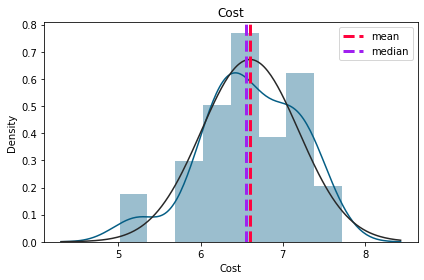

In [ ]:
for i,col in enumerate(['Cost']) :
    sns.distplot(cluster_df[col], color = '#055E85', fit = norm);
    feature = cluster_df[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1), loc = 'up')
    plt.title(f'{col.title()}');
    plt.tight_layout();

* Since I have applied capping method, it changes mean and median, hence trying to achieve normal distribution using log transformation which is a method for treating positive skewness.

Gaussian transformation generally used to convert data distribution into normal distribution.

### 6. Data Scaling

In [ ]:
cluster_dummy.sample(5)

,Restaurant,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,...,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
25,Tiki Shack,6.91,3.48,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,Feast - Sheraton Hyderabad Hotel,7.72,4.22,4,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
18,10 Downing Street,7.55,3.80,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
65,Komatose - Holiday Inn Express & Suites,7.31,3.69,4,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
19,Pakwaan Grand,5.99,2.71,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
numerical_cols = ['Cost','Total_Cuisine_Count','Average_Rating']
scaler = StandardScaler()
scaler.fit(cluster_dummy[numerical_cols])
scaled_df = cluster_dummy.copy()
scaled_df[numerical_cols] = scaler.transform(cluster_dummy[numerical_cols])

##### Which method have you used to scale you data and why?

* Here I have used standard scaler as those numerical columns where normally distributed.

### 7. Dimesionality Reduction

In [ ]:
scaled_df.set_index(['Restaurant'],inplace=True)
features = scaled_df.columns
pca = PCA()
pca.fit(scaled_df[features])

PCA()

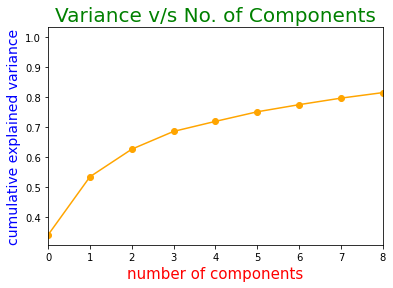

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker ='o', color = 'orange')
plt.xlabel('number of components',size = 15, color = 'red')
plt.ylabel('cumulative explained variance',size = 14, color = 'blue')
plt.title('Variance v/s No. of Components',size = 20, color = 'green')
plt.xlim([0, 8])
plt.show()

In [ ]:
pca = PCA(n_components=3)

pca.fit(scaled_df[features])

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

print('Cumulative variance explained by 3 principal components: {:.2%}'.format(
                                        np.sum(pca.explained_variance_ratio_)))

df_pca = pca.transform(scaled_df[features])

Explained variation per principal component: [0.34148554 0.1936559  0.0919578 ]
Cumulative variance explained by 3 principal components: 62.71%


In [ ]:
print("original shape: ", scaled_df.shape)
print("transformed shape:", df_pca.shape)

original shape:  (100, 47)
transformed shape: (100, 3)


### 8. Data Splitting

In [ ]:

X = X_tfidf 
y = sentiment_df['Sentiment']

In [ ]:
sentiment_df.shape

(9961, 6)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (7968, 17327)
Number transactions y_train dataset:  (7968,)
Number transactions X_test dataset:  (1993, 17327)
Number transactions y_test dataset:  (1993,)


### 9. Handling Imbalanced Dataset

In [ ]:
vc = sentiment_df.Sentiment.value_counts().reset_index().rename(columns = 
            {'index':'Sentiment','Sentiment':'Count'})

In [ ]:
majority_class = vc.Count[0]
minority_class = vc.Count[1]

In [ ]:
CIR = majority_class / minority_class
CIR

1.701654461621915

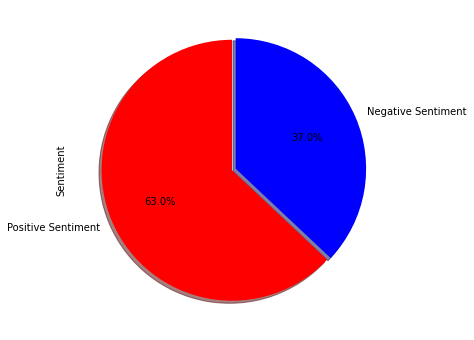

In [ ]:
sentiment_df['Sentiment'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Positive Sentiment','Negative Sentiment'],
                               colors=['red','blue'],
                               explode=[0.01,0.02]
                              )
plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state = 20)
    km.fit(df_pca)
    wcss.append(km.inertia_)

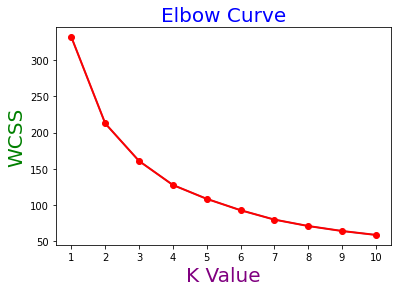

In [ ]:
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="o")
plt.xlabel("K Value", size = 20, color = 'purple')
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS", size = 20, color = 'green')
plt.title('Elbow Curve', size = 20, color = 'blue')
plt.show()

For n_clusters = 2 average silhouette_score is : 0.3135749171591743
For n_clusters = 3 average silhouette_score is : 0.2974211971806104
For n_clusters = 4 average silhouette_score is : 0.3127440012825435
For n_clusters = 5 average silhouette_score is : 0.30244427842780736
For n_clusters = 6 average silhouette_score is : 0.3167480002610183
For n_clusters = 7 average silhouette_score is : 0.3096547441888911
For n_clusters = 8 average silhouette_score is : 0.29778072472714795
For n_clusters = 9 average silhouette_score is : 0.29957199850588156


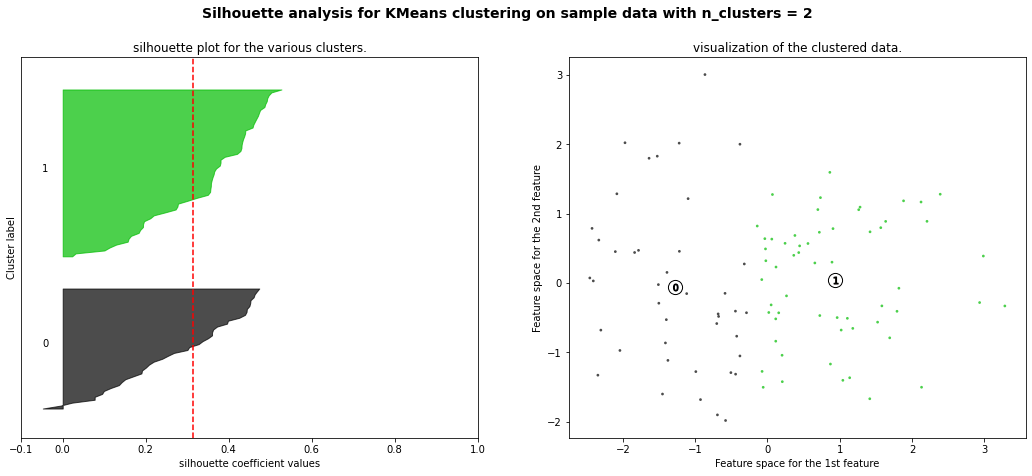

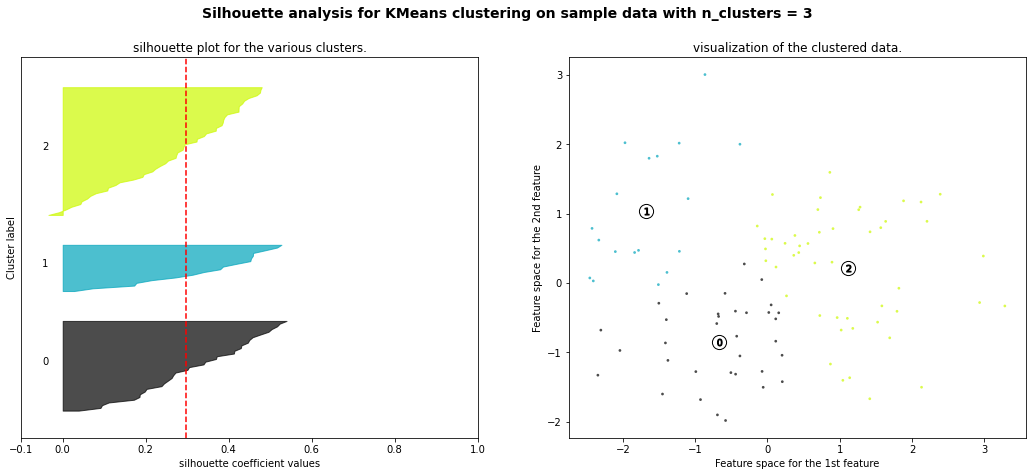

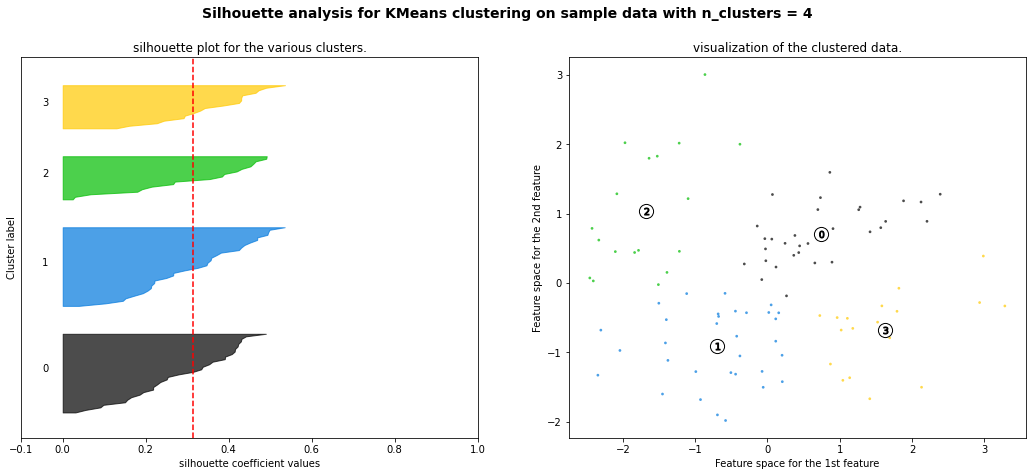

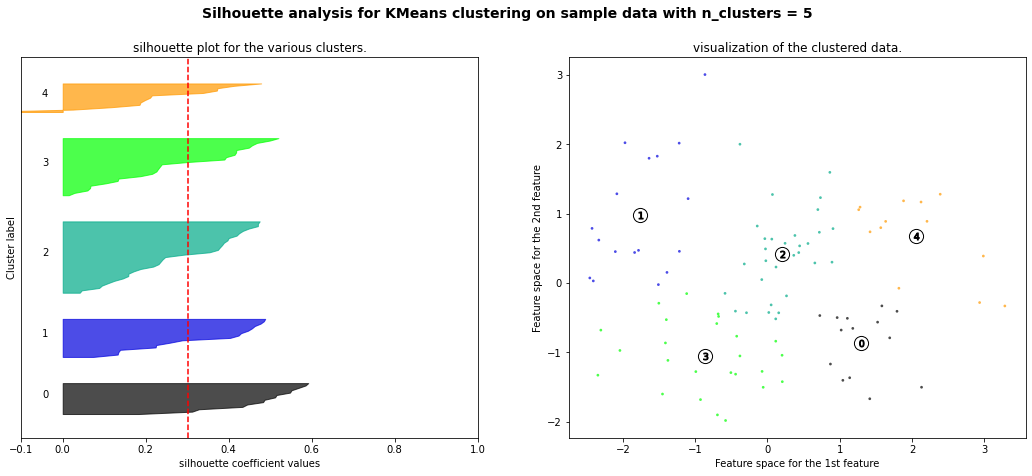

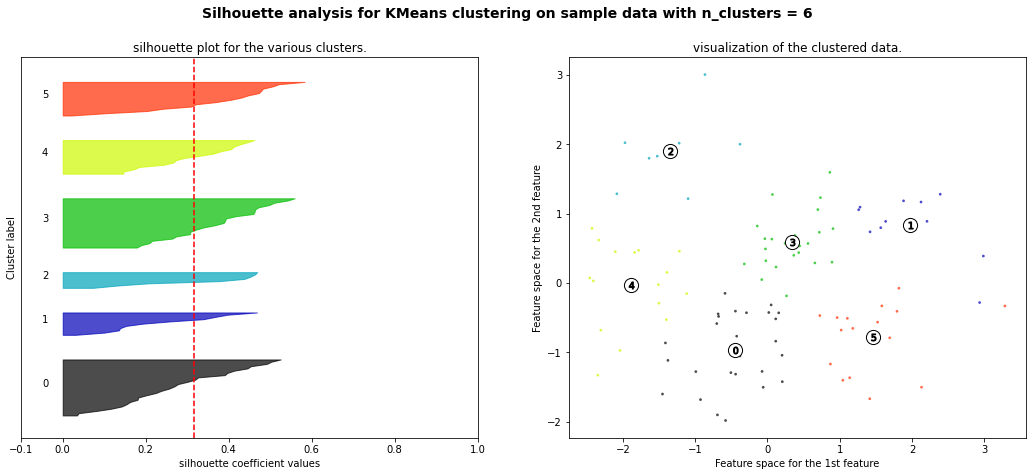

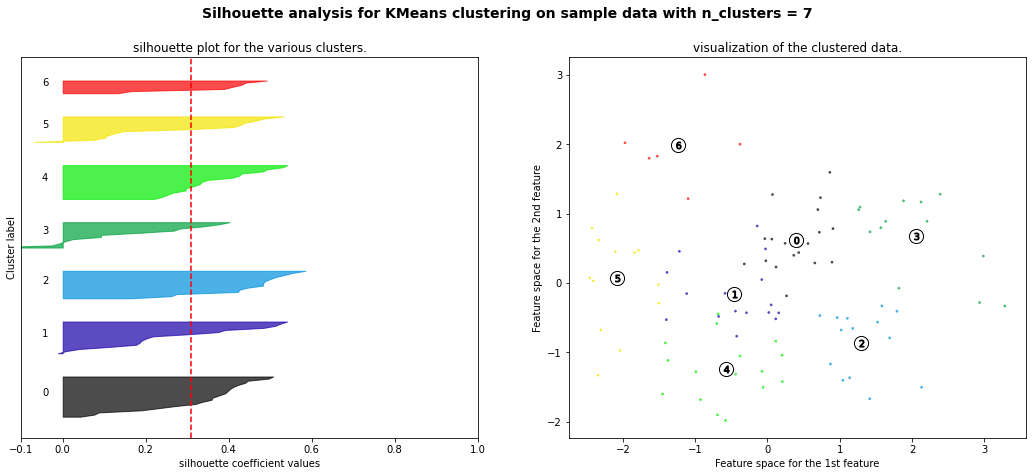

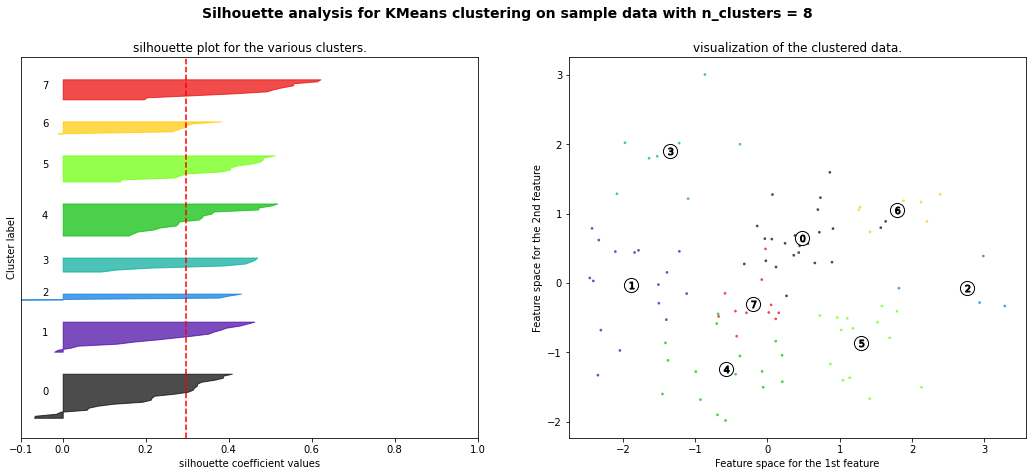

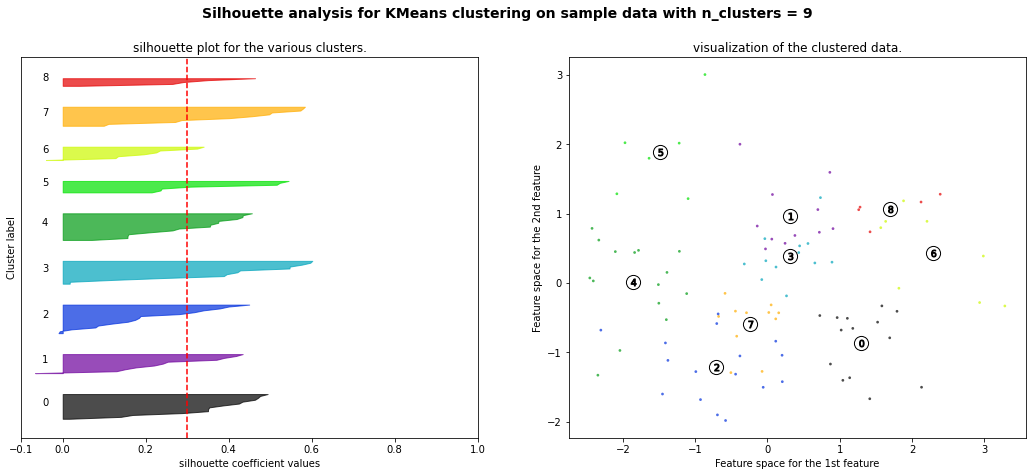

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import ParameterGrid
parameters = list(range(2,10))

parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1

for n_clusters in parameters:
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    
    ax1.set_xlim([-0.1, 1])
    
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

   
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_pca)

   
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
       
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

             ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      
        y_lower = y_upper + 10  
    ax1.set_title("silhouette plot for the various clusters.")
    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_pca[:, 0], df_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

        centers = clusterer.cluster_centers_
    
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
   
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

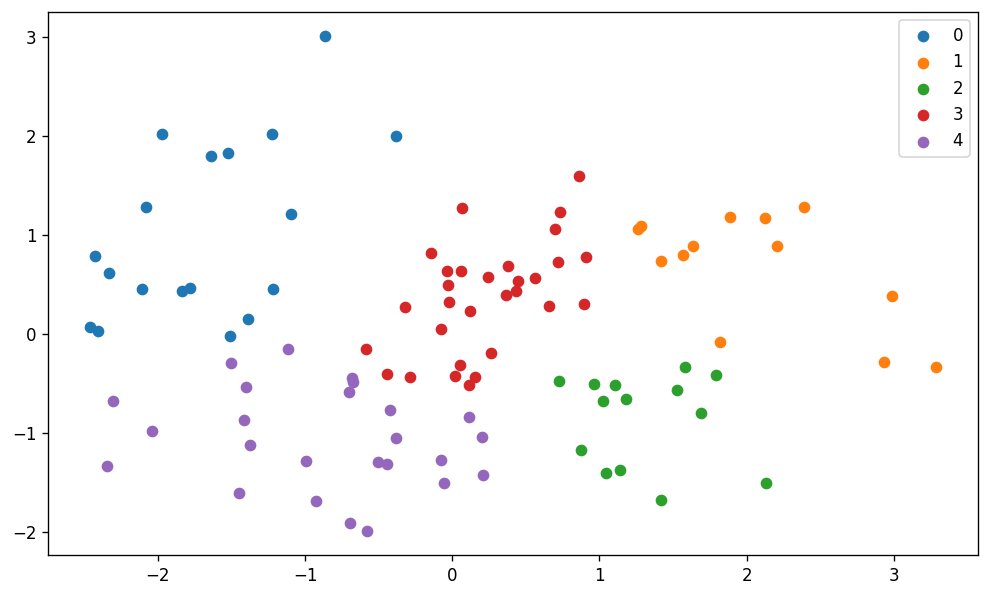

In [ ]:

plt.figure(figsize = (10,6), dpi = 120)

kmeans= KMeans(n_clusters = 5, init= 'k-means++', random_state = 42)
kmeans.fit(df_pca)

label = kmeans.fit_predict(df_pca)

unique_labels = np.unique(label)
 
for i in unique_labels:
    plt.scatter(df_pca[label == i , 0] , df_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
kmeans_pca_df = pd.DataFrame(df_pca,columns=['PC1','PC2','PC3'],index=scaled_df.index)
kmeans_pca_df["label"] = label
kmeans_pca_df.sample(2)

,PC1,PC2,PC3,label
Restaurant,,,,
PourHouse7,-1.50,-0.29,-0.17,4
SKYHY,-0.68,-0.48,-1.09,4


In [ ]:
cluster_dummy.set_index(['Restaurant'],inplace=True)
cluster_dummy = cluster_dummy.join(kmeans_pca_df['label'])
cluster_dummy.sample(2)

,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,...,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps,label
Restaurant,,,,,,,,,,,,,,,,,,,,,
Chinese Pavilion,6.91,3.75,2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,3
Komatose - Holiday Inn Express & Suites,7.31,3.69,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4


In [ ]:
cluster_dummy['Cost'] = np.expm1(cluster_dummy['Cost'])
cluster_dummy.sample(2)

,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,...,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps,label
Restaurant,,,,,,,,,,,,,,,,,,,,,
PourHouse7,1200.00,3.86,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
Desi Bytes,400.00,2.90,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [ ]:
clustering_result = cluster_dummy.copy().reset_index()
clustering_result = hotel[['Restaurant','Cuisines']].merge(clustering_result[['Restaurant','Cost',
                  'Average_Rating',	'Total_Cuisine_Count','label']], on = 'Restaurant')
clustering_result.head()

,Restaurant,Cuisines,Cost,Average_Rating,Total_Cuisine_Count,label
0,Beyond Flavours,"Chinese, Continental, Kebab, European, South I...",800.00,4.28,6,4
1,Paradise,"Biryani, North Indian, Chinese",800.00,4.70,3,0
2,Flechazo,"Asian, Mediterranean, North Indian, Desserts",1300.00,4.66,4,0
3,Shah Ghouse Hotel & Restaurant,"Biryani, North Indian, Chinese, Seafood, Bever...",800.00,3.21,5,4
4,Over The Moon Brew Company,"Asian, Continental, North Indian, Chinese, Med...",1200.00,4.34,5,0


In [ ]:
cluster_count = cluster_dummy['label'].value_counts().reset_index().rename(
    columns={'index':'label','label':'Total_Restaurant'}).sort_values(by='Total_Restaurant')
cluster_count

,label,Total_Restaurant
4,1,13
3,2,14
2,0,18
1,4,25
0,3,30


In [ ]:
new_cluster_df = clustering_result.copy()
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].str.split(',')
new_cluster_df = new_cluster_df.explode('Cuisines')
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].apply(lambda x: x.strip())
new_cluster_df.sample(5)

,Restaurant,Cuisines,Cost,Average_Rating,Total_Cuisine_Count,label
0,Beyond Flavours,Chinese,800.00,4.28,6,4
82,Al Saba Restaurant,North Indian,750.00,3.15,5,4
80,Tandoori Food Works,North Indian,500.00,3.27,3,2
52,Biryanis And More,Biryani,500.00,3.74,3,3
38,The Glass Onion,Continental,1200.00,3.83,4,0


In [ ]:
for cluster in new_cluster_df['label'].unique().tolist():
  print('Cuisine List for Cluster :', cluster,'\n')
  print(new_cluster_df[new_cluster_df["label"]== cluster]['Cuisines'].unique(),'\n')
  print('='*120)

Cuisine List for Cluster : 4 

['Chinese' 'Continental' 'Kebab' 'European' 'South Indian' 'North Indian'
 'Biryani' 'Seafood' 'Beverages' 'Healthy Food' 'American' 'Japanese'
 'Italian' 'Salad' 'Sushi' 'Mexican' 'Bakery' 'Mughlai' 'Juices' 'Andhra'
 'Hyderabadi' 'Spanish' 'Finger Food' 'Thai' 'Indonesian' 'Asian' 'Momos'
 'Desserts' 'Cafe' 'Burger' 'Fast Food'] 

Cuisine List for Cluster : 0 

['Biryani' 'North Indian' 'Chinese' 'Asian' 'Mediterranean' 'Desserts'
 'Continental' 'Seafood' 'Goan' 'Kebab' 'BBQ' 'European' 'American'
 'Italian' 'South Indian' 'Modern Indian' 'Sushi'] 

Cuisine List for Cluster : 1 

['Lebanese' 'Ice Cream' 'Desserts' 'North Indian' 'Fast Food' 'Asian'
 'Beverages' 'Bakery' 'Momos' 'Pizza' 'Street Food' 'Arabian'] 

Cuisine List for Cluster : 2 

['Street Food' 'North Indian' 'Fast Food' 'Burger' 'Chinese' 'Biryani'
 'Mughlai' 'South Indian' 'Desserts' 'Kebab' 'Cafe'] 

Cuisine List for Cluster : 3 

['Continental' 'American' 'Chinese' 'North Indian' 'Itali

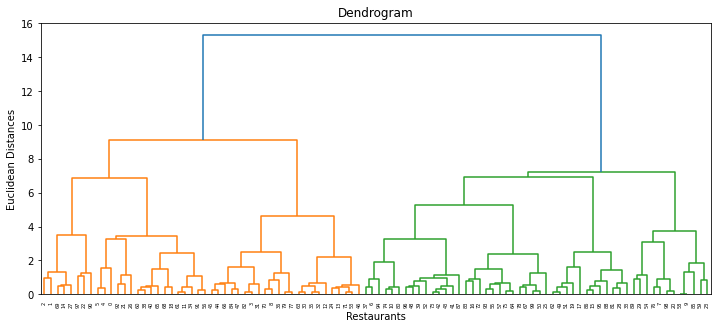

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,5))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method = 'ward'),orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

plt.title('Dendrogram')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distances')

plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(df_pca)
    score = silhouette_score(df_pca, y_hc)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.29566419533238886
For n_clusters = 3, silhouette score is 0.22528398856680545
For n_clusters = 4, silhouette score is 0.20865729675680533
For n_clusters = 5, silhouette score is 0.24665245903028193
For n_clusters = 6, silhouette score is 0.27119012773344164
For n_clusters = 7, silhouette score is 0.26861108935379174
For n_clusters = 8, silhouette score is 0.28150770224086563
For n_clusters = 9, silhouette score is 0.288036427814913
For n_clusters = 10, silhouette score is 0.28854504323722197
For n_clusters = 11, silhouette score is 0.29952838233213475
For n_clusters = 12, silhouette score is 0.31428857933967697
For n_clusters = 13, silhouette score is 0.31583604234420365
For n_clusters = 14, silhouette score is 0.3273629599939925
For n_clusters = 15, silhouette score is 0.33655269068108956


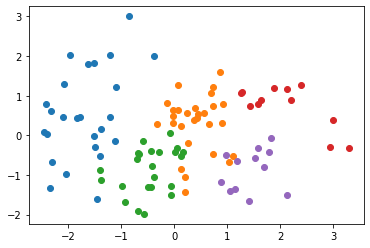

Silhouette Coefficient: 0.247
davies_bouldin_score 1.151


In [ ]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification

model = AgglomerativeClustering(n_clusters = 5)      
y_hc = model.fit_predict(df_pca)


for cluster in clusters:

	row_ix = where(y_hc == cluster)

	plt.scatter(df_pca[row_ix, 0], df_pca[row_ix, 1])

plt.show()



print("Silhouette Coefficient: %0.3f"%silhouette_score(df_pca,y_hc, metric='euclidean'))


from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(df_pca, y_hc)
print("davies_bouldin_score %0.3f"%davies_bouldin_score(df_pca, y_hc))

In [ ]:
clustering_result['label_hr'] = y_hc

In [ ]:
clustering_result.sample(5)

,Restaurant,Cuisines,Cost,Average_Rating,Total_Cuisine_Count,label,label_hr
82,Al Saba Restaurant,"North Indian, Chinese, Seafood, Biryani, Hyder...",750.00,3.15,5,4,2
21,Jonathan's Kitchen - Holiday Inn Express & Suites,"North Indian, Japanese, Italian, Salad, Sushi",1900.00,3.54,5,4,0
34,Mazzo - Marriott Executive Apartments,"Italian, North Indian, South Indian, Asian",1700.00,4.19,4,0,0
15,KFC,"Burger, Fast Food",500.00,2.85,2,2,4
65,Komatose - Holiday Inn Express & Suites,"North Indian, Chinese, Japanese, Sushi",1500.00,3.69,4,4,0


#### 2. Cross- Validation & Hyperparameter Tuning


---

**Not required**

**LDA**

In [ ]:
from sklearn.metrics import silhouette_score

topic_range = range(2, 11)
silhouette_scores = []

for n_components in topic_range:
    lda = LatentDirichletAllocation(n_components=n_components)
    lda.fit(X)
    labels = lda.transform(X).argmax(axis=1)
    silhouette_scores.append(silhouette_score(X, labels))


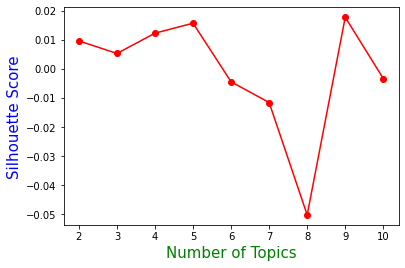

In [ ]:
plt.plot(topic_range, silhouette_scores, marker ='o', color='red')
plt.xlabel('Number of Topics', size = 15, color = 'green')
plt.ylabel('Silhouette Score', size = 15, color = 'blue')
plt.show()

In [ ]:
lda = LatentDirichletAllocation(n_components=4)
lda.fit(X)

LatentDirichletAllocation(n_components=4)

In [ ]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [ ]:
lda_pyLDAvis = pyLDAvis.sklearn.prepare(lda, X, vectorizer, mds='tsne')
lda_pyLDAvis

PreparedData(topic_coordinates=           x       y  topics  cluster  Freq
topic                                      
3     269.56 -124.80       1        1 71.41
2       1.78 -295.08       2        1 15.68
0     220.81 -343.83       3        1  6.72
1      50.53  -76.05       4        1  6.19, topic_info=            Term   Freq  Total Category  logprob  loglift
3865    delivery  84.00  84.00  Default    30.00    30.00
9926        nice 161.00 161.00  Default    29.00    29.00
4901   excellent  69.00  69.00  Default    28.00    28.00
3858   delivered  35.00  35.00  Default    27.00    27.00
1182         bad  86.00  86.00  Default    26.00    26.00
...          ...    ...    ...      ...      ...      ...
16376      waste   2.70  25.29   Topic4    -6.82     0.55
10413      order   4.31 108.58   Topic4    -6.35    -0.44
2110      burger   2.13  45.68   Topic4    -7.06    -0.28
2618      chiken   1.34   5.15   Topic4    -7.52     1.43
3856     deliver   1.34  13.03   Topic4    -7.52     0.51

[259 rows x 6 columns], token_table=       Topic  Freq      Term
term                        
151        3  0.58  addicted
310        3  0.68  alauddin
402        1  0.91      also
402        2  0.09      also
439        1  0.80   amazing
...      ...   ...       ...
16697      4  0.43      wrap
16714      1  0.63     wrong
16714      2  0.08     wrong
16714      4  0.31     wrong
17279      4  0.84         🤗

[340 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 2])

In [ ]:
review_sentiment_prediction = review[review_df.columns.to_list()].copy()
review_sentiment_prediction.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.00,"1 Review , 2 Followers",2019-05-25 15:54:00,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.00,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.00,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.00,"1 Review , 1 Follower",2019-05-24 22:11:00,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.00,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0


In [ ]:
topic_results = lda.transform(X)
review_sentiment_prediction['Prediction'] = topic_results.argmax(axis=1)
review_sentiment_prediction.sample(5)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Prediction
4538,Owm Nom Nom,Manoj Gurrevala,Taste is okay and ambience is just fine. But m...,3.00,"43 Reviews , 28 Followers",2018-09-09 19:13:00,0,3
5689,Feast - Sheraton Hyderabad Hotel,Anilpaturi,Food was delicious and it has a large selectio...,5.00,2 Reviews,2018-12-14 21:06:00,0,3
2867,Behrouz Biryani,Subbu G,good food and tasty,5.00,2 Reviews,2018-10-20 13:43:00,0,3
4886,Udipi's Upahar,Malik Yafai,thanks udipi,5.00,"3 Reviews , 1 Follower",2018-07-13 11:27:00,0,0
1128,Barbeque Nation,Imran Asghar,"Awesome place, Awesome food, lovely staff (Aza...",5.00,1 Review,2019-01-21 21:19:00,1,3


🗒argmax(axis=1) returns the index of the topic that has the highest probability for each sample, it finds the topic that has the highest probability of describing each sample in the dataset

TOP 100 WORDS FOR TOPIC #0


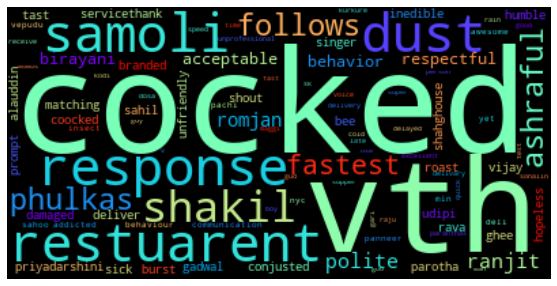

TOP 100 WORDS FOR TOPIC #1


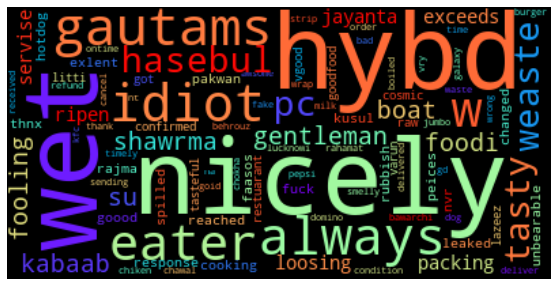

TOP 100 WORDS FOR TOPIC #2


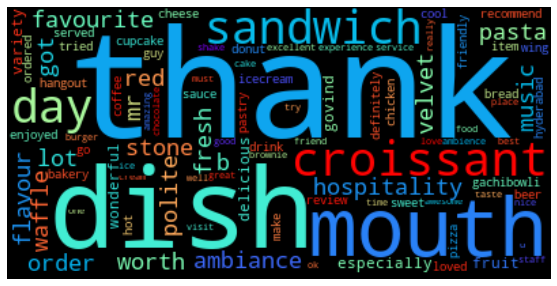

TOP 100 WORDS FOR TOPIC #3


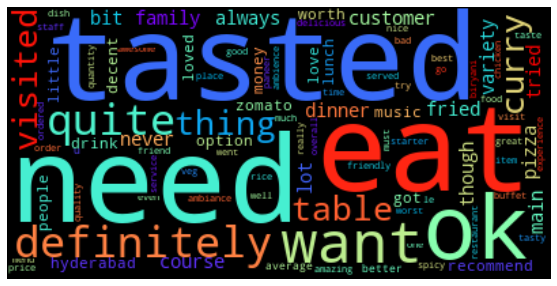

In [ ]:
N = 100

topic_text = []
for index, topic in enumerate(lda.components_):
    topic_words = [vectorizer.get_feature_names()[i] for i in topic.argsort()[-N:]]
    topic_text.append(" ".join(topic_words))

for i in range(len(topic_text)):
    print(f'TOP 100 WORDS FOR TOPIC #{i}')
    wordcloud = WordCloud(background_color="black",colormap='rainbow').generate(topic_text[i])
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    print('='*120)

In [ ]:
for sentiment in review_sentiment_prediction['Prediction'].unique().tolist():
  print('Prediction = ',sentiment,'\n')
  print(review_sentiment_prediction[review_sentiment_prediction['Prediction'] == 
        sentiment]['Rating'].value_counts())
  print('='*120)

Prediction =  3 

5.00    2713
4.00    2094
1.00    1549
3.00    1071
2.00     622
4.50      48
3.50      32
2.50      17
1.50       8
Name: Rating, dtype: int64
Prediction =  2 

5.00    760
4.00    246
1.00    100
3.00     94
2.00     35
4.50     21
3.50     15
2.50      2
1.50      1
Name: Rating, dtype: int64
Prediction =  0 

5.00    287
1.00     38
4.00     18
3.00     16
2.00     16
Name: Rating, dtype: int64
Prediction =  1 

5.00    72
1.00    48
4.00    15
3.00    12
2.00    11
Name: Rating, dtype: int64


* LDA is an unsupervised learning algorithm, it doesn't have any predefined labels. The labels are assigned based on the analysis done on the words, the weights of the words, and the context of the words in each topic.

 So, the predicted topic is not a definite answer, therfore experimenting with different techniques like using supervised algorithm and combining the results to make a more accurate sentiment labeling.





####Supervised Sentiment Analysis

* Combining supervised learning to know better about sentiments. 

In [ ]:
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
from tabulate import tabulate
import itertools


def calculate_scores(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
  

    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, cmap='Wistia')


    class_names = ["Positive", "Negative"]
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.show()
    print(cm)
    return roc_auc, f1, accuracy, precision, recall


def print_table(model, X_train, y_train, X_test, y_test):
    roc_auc, f1, accuracy, precision, recall = calculate_scores(model, X_train, y_train, X_test, y_test)
    table = [["ROC AUC", roc_auc], ["Precision", precision], 
             ["Recall", recall], ["F1", f1], ["Accuracy", accuracy]]
    print(tabulate(table, headers=["Metric", "Score"]))

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

**XgBoost**

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Logistic Regression**

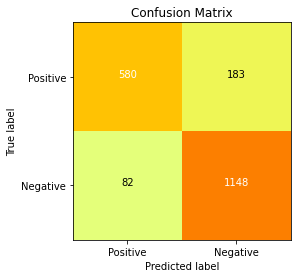

[[ 580  183]
 [  82 1148]]
Metric        Score
---------  --------
ROC AUC    0.846745
Precision  0.862509
Recall     0.933333
F1         0.896525
Accuracy   0.867035


In [ ]:
print_table(clf, X_train, y_train, X_test, y_test)

The first row of the matrix represents the predicted positive class (1) and the second row represents the predicted negative class (0). The first column represents the actual positive class (1) and the second column represents the actual negative class (0).

* 580 instances are labeled as True Positive (correctly predicted as positive)
* 183 instances are labeled as False Positive (incorrectly predicted as positive)
* 1148 instances are labeled as True Negative (correctly predicted as negative)
* 82 instances are labeled as False Negative (incorrectly predicted as negative)

**XgBoost**

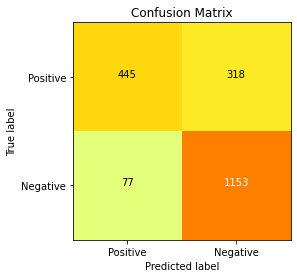

[[ 445  318]
 [  77 1153]]
Metric        Score
---------  --------
ROC AUC    0.760311
Precision  0.783821
Recall     0.937398
F1         0.853758
Accuracy   0.801806


In [ ]:
print_table(xgb, X_train, y_train, X_test, y_test)

The first row of the matrix represents the predicted positive class (1) and the second row represents the predicted negative class (0). The first column represents the actual positive class (1) and the second column represents the actual negative class (0).

* 445 instances are labeled as True Positive (correctly predicted as positive)
* 318 instances are labeled as False Positive (incorrectly predicted as positive)
* 1153 instances are labeled as True Negative (correctly predicted as negative)
* 77 instances are labeled as False Negative (incorrectly predicted as negative)

#### 2. Cross- Validation & Hyperparameter Tuning

**Logistic Regression**

In [ ]:
param_dict = {'C': [0.1,1,10,100,1000],'penalty': ['l1', 'l2'],'max_iter':[1000]} 
clf_grid = GridSearchCV(clf, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall') 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


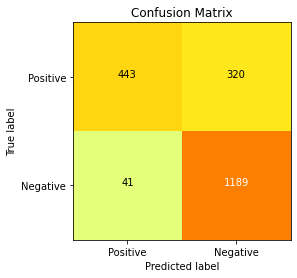

[[ 443  320]
 [  41 1189]]
Metric        Score
---------  --------
ROC AUC    0.773635
Precision  0.787939
Recall     0.966667
F1         0.8682
Accuracy   0.818866


In [ ]:
print_table(clf_grid, X_train, y_train, X_test, y_test)

The first row of the matrix represents the predicted positive class (1) and the second row represents the predicted negative class (0). The first column represents the actual positive class (1) and the second column represents the actual negative class (0).

* 443 instances are labeled as True Positive (correctly predicted as positive)
* 320 instances are labeled as False Positive (incorrectly predicted as positive)
* 1189 instances are labeled as True Negative (correctly predicted as negative)
* 41 instances are labeled as False Negative (incorrectly predicted as negative)

**XgBoost**

In [ ]:
xgb_param={'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
xgb_grid=GridSearchCV(estimator=xgb,param_grid = xgb_param,cv=3,scoring='recall',verbose=5,n_jobs = -1)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


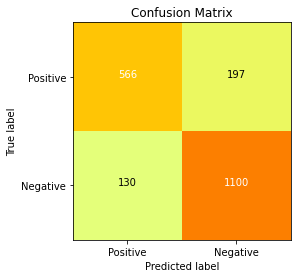

[[ 566  197]
 [ 130 1100]]
Metric        Score
---------  --------
ROC AUC    0.818059
Precision  0.848111
Recall     0.894309
F1         0.870598
Accuracy   0.835926


In [ ]:
print_table(xgb_grid, X_train, y_train, X_test, y_test)

The first row of the matrix represents the predicted positive class (1) and the second row represents the predicted negative class (0). The first column represents the actual positive class (1) and the second column represents the actual negative class (0).

* 566 instances are labeled as True Positive (correctly predicted as positive)
* 197 instances are labeled as False Positive (incorrectly predicted as positive)
* 1100 instances are labeled as True Negative (correctly predicted as negative)
* 130 instances are labeled as False Negative (incorrectly predicted as negative)

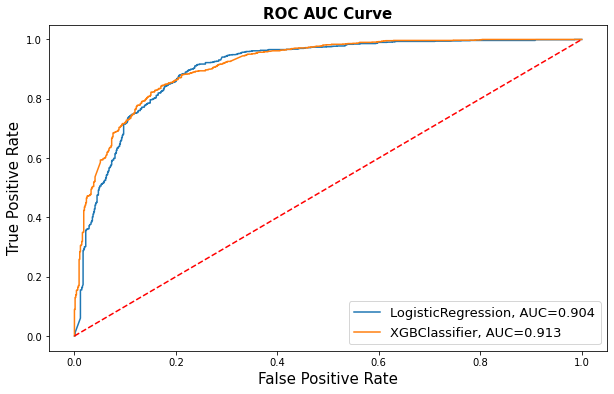

In [ ]:
from sklearn.metrics import roc_curve

log_reg_best = clf_grid.best_estimator_
xgbc_best = xgb_grid.best_estimator_

y_preds_proba_lr = log_reg_best.predict_proba(X_test)[::,1]
y_preds_proba_xgbc = xgbc_best.predict_proba(X_test)[::,1]

classifiers_proba = [(log_reg_best, y_preds_proba_lr),
                    (xgbc_best, y_preds_proba_xgbc)]


result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(10,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1],'r--')

plt.xlabel("False Positive Rate", fontsize=15)

plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC AUC Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [ ]:
restaurant_df = cluster_dummy.copy()
restaurant_df = restaurant_df.reset_index()
restaurant_df = restaurant_df.drop(columns = ['Cost',	'Average_Rating',	'Total_Cuisine_Count','label'], axis =1)
restaurant_df.head(2)

,Restaurant,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,...,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
0,Beyond Flavours,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,Paradise,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
restaurant_df.shape

(100, 45)

In [ ]:
rest_genre = restaurant_df.loc[:, restaurant_df.columns != 'Restaurant']
rest_matrix = rest_genre.values
rest_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
rest_matrix.shape

(100, 44)

In [ ]:
user_df = sentiment_df[['Reviewer',	'Restaurant',	'Rating']].copy()
user_df.head()

,Reviewer,Restaurant,Rating
0,Rusha Chakraborty,Beyond Flavours,5.00
1,Anusha Tirumalaneedi,Beyond Flavours,5.00
2,Ashok Shekhawat,Beyond Flavours,5.00
3,Swapnil Sarkar,Beyond Flavours,5.00
4,Dileep,Beyond Flavours,5.00


In [ ]:
user_df.shape

(9961, 3)

In [ ]:
grouped_data = user_df.groupby('Reviewer')

def create_new_column(data):
    return [{'Restaurant': row['Restaurant'], 'Rating': row['Rating']} for _, row in data.iterrows()]

user_rating = grouped_data.apply(create_new_column)
user_rating = user_rating.reset_index().rename(columns ={0:'Rated_Restaurant'})
user_rating.head()

,Reviewer,Rated_Restaurant
0,#FOODPORN,[{'Restaurant': 'Zega - Sheraton Hyderabad Hot...
1,#chloesviews // CAH,"[{'Restaurant': 'eat.fit', 'Rating': 5.0}]"
2,$ign,"[{'Restaurant': 'SKYHY', 'Rating': 4.0}]"
3,4mybanti,"[{'Restaurant': 'Ulavacharu', 'Rating': 2.0}]"
4,@FuloriBinaChutneyKaiseBani,"[{'Restaurant': 'Chinese Pavilion', 'Rating': ..."


In [ ]:
#shape
user_rating.shape

(7446, 2)

In [ ]:
user_rated_restaurant = {}
for index, row in user_rating.iterrows():
    user_rated_restaurant[row['Reviewer']] = {}
    for i in range(len(row['Rated_Restaurant'])):
        user_rated_restaurant[row['Reviewer']][row['Rated_Restaurant'][i][
            'Restaurant']] = row['Rated_Restaurant'][i]['Rating']

user_preference_vector = pd.DataFrame(np.zeros((len(user_rating), len(restaurant_df))), 
                      columns=restaurant_df.Restaurant, index=user_rating['Reviewer'])

for index, row in user_rating.iterrows():
    for i in range(len(row['Rated_Restaurant'])):
        restaurant = row['Rated_Restaurant'][i]['Restaurant']
        rating = row['Rated_Restaurant'][i]['Rating']
        user_preference_vector.loc[row['Reviewer'], restaurant] = rating

user_preference_vector = user_preference_vector.reset_index()

In [ ]:
user_preference_vector.sample(5)

Restaurant,Reviewer,Beyond Flavours,Paradise,Flechazo,Shah Ghouse Hotel & Restaurant,Over The Moon Brew Company,The Fisherman's Wharf,eat.fit,Shah Ghouse Spl Shawarma,Hyper Local,...,Arena Eleven,Cascade - Radisson Hyderabad Hitec City,Collage - Hyatt Hyderabad Gachibowli,Zing's Northeast Kitchen,Dunkin' Donuts,Desi Bytes,Hyderabadi Daawat,Zega - Sheraton Hyderabad Hotel,Triptify,Chinese Pavilion
1154,Bhanu Chandar,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6008,Snehalakshmi Vijayanandan,0.00,0.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1009,Atulay Mahajan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00
2548,Karthik Botla,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
1834,Ganaeducations,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
result_df = pd.DataFrame(columns = rest_genre.columns)
for index, row in user_preference_vector.iterrows():
    user_preference_vector_array = row[1:].values.reshape(1,-1)
    dot_product = np.dot(user_preference_vector_array, rest_matrix)
    result_df = result_df.append(pd.DataFrame(dot_product, columns = rest_genre.columns, index = [row['Reviewer']]))

result_df = result_df.reset_index().rename(columns ={'index':'Reviewer'})

In [ ]:
result_df[:5]

,Reviewer,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,...,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
0,#FOODPORN,0.00,0.00,0.00,5.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,0.00,0.00
1,#chloesviews // CAH,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,5.00,0.00,0.00,0.00,5.00,0.00,0.00,0.00,0.00,0.00
2,$ign,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,4mybanti,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,@FuloriBinaChutneyKaiseBani,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
test_user_ids = user_rating.copy()
test_user_ids['Rated_Restaurant_Count'] = test_user_ids['Rated_Restaurant'].apply(lambda x: len(x))

test_user_ids = test_user_ids.sort_values('Rated_Restaurant_Count', ascending = False)[:1000]
test_user_ids.head()

,Reviewer,Rated_Restaurant,Rated_Restaurant_Count
655,Ankita,"[{'Restaurant': 'Hyper Local', 'Rating': 4.0},...",13
3858,Parijat Ray,"[{'Restaurant': 'Hyper Local', 'Rating': 4.0},...",13
2654,Kiran,[{'Restaurant': 'Shah Ghouse Hotel & Restauran...,12
2313,Jay Mehta,"[{'Restaurant': 'NorFest - The Dhaba', 'Rating...",11
7013,Vedant Killa,"[{'Restaurant': 'Barbeque Nation', 'Rating': 5...",11


In [ ]:
test_user_ids = test_user_ids['Reviewer'].to_list()
print(f"Total numbers of test users {len(test_user_ids)}")

Total numbers of test users 1000


In [ ]:
test_user_profile = result_df[result_df['Reviewer']=='Ankita']
test_user_profile

,Reviewer,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,...,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
655,Ankita,12.00,12.00,0.00,0.00,0.00,4.00,0.00,8.00,0.00,...,36.00,0.00,4.00,0.00,13.00,0.00,0.00,4.00,0.00,4.00


In [ ]:
test_user_vector = test_user_profile.iloc[0, 1:].values
test_user_vector

array([12.0, 12.0, 0.0, 0.0, 0.0, 4.0, 0.0, 8.0, 0.0, 0.0, 26.0, 12.0,
       8.0, 0.0, 4.0, 4.0, 0.0, 0.0, 3.0, 0.0, 0.0, 8.0, 4.0, 0.0, 4.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 36.0, 0.0, 4.0, 0.0,
       13.0, 0.0, 0.0, 4.0, 0.0, 4.0], dtype=object)

In [ ]:
liked_restaurant = user_df[user_df['Reviewer'] == 'Ankita']['Restaurant'].to_list()
liked_restaurant = set(liked_restaurant)
liked_restaurant

{'Absolute Sizzlers',
 'Arena Eleven',
 'Banana Leaf Multicuisine Restaurant',
 'Hyper Local',
 "Jonathan's Kitchen - Holiday Inn Express & Suites",
 'KS Bakers',
 'Kritunga Restaurant',
 'SKYHY',
 'The Foodie Monster Kitchen',
 'The Lal Street - Bar Exchange',
 'Triptify',
 "Udipi's Upahar",
 'Ulavacharu'}

In [ ]:
all_restaurant = set(restaurant_df['Restaurant'].values)

In [ ]:
unknown_restaurant = all_restaurant.difference(liked_restaurant)

In [ ]:
unknown_restaurant_genres = restaurant_df[restaurant_df['Restaurant'].isin(unknown_restaurant)]
restaurant_matrix = unknown_restaurant_genres.iloc[:, 1:].values
restaurant_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:

score = np.dot(restaurant_matrix[1], test_user_vector)
score

70.0

In [ ]:
score_threshold = 10.0

res_dict = {}

In [ ]:
def generate_recommendation_scores():
    users = []
    restaurant = []
    scores = []
    for user_id in test_user_ids:
        test_user_profile = result_df[result_df['Reviewer'] == user_id]
      
        test_user_vector = test_user_profile.iloc[0, 1:].values

        
              liked_restaurant = user_df[user_df['Reviewer'] == user_id]['Restaurant'].to_list()
        all_restaurant = set(restaurant_df['Restaurant'].values)
        unknown_restautant = all_restaurant.difference(liked_restaurant)
        unknown_restaurant_genres = restaurant_df[restaurant_df['Restaurant'].isin(unknown_restaurant)]
        unknown_restaurant_ids = unknown_restaurant_genres.iloc[:, :1].values
        
        recommendation_scores = np.dot(unknown_restaurant_genres.iloc[:, 1:].values, test_user_vector)


        for i in range(0, len(unknown_restaurant_ids)):
            score = recommendation_scores[i]
                       if score >= score_threshold:
              users.append(user_id)
              restaurant.append(unknown_restaurant_ids[i])
              scores.append(recommendation_scores[i])
                
    return users, restaurant, scores

In [ ]:
users, restaurant, scores = generate_recommendation_scores()
res_dict['User'] = users
res_dict['Restaurant'] = restaurant
res_dict['Score'] = scores
res_df = pd.DataFrame(res_dict, columns=['User', 'Restaurant', 'Score'])
res_df['Restaurant'] = res_df['Restaurant'].apply(lambda x: str(x[0]))
res_df

,User,Restaurant,Score
0,Ankita,Beyond Flavours,91.00
1,Ankita,Paradise,70.00
2,Ankita,Flechazo,44.00
3,Ankita,Shah Ghouse Hotel & Restaurant,70.00
4,Ankita,Over The Moon Brew Company,74.00
...,...,...,...
28336,Simi Reddy,Delhi-39,10.00
28337,Simi Reddy,Al Saba Restaurant,15.00
28338,Simi Reddy,T Grill,20.00
28339,Simi Reddy,Collage - Hyatt Hyderabad Gachibowli,14.00


In [ ]:
recom_rest = res_df.groupby('Restaurant')['User'].count().reset_index().sort_values(
                            'User', ascending = False)
recom_rest[:5]

,Restaurant,User
19,Collage - Hyatt Hyderabad Gachibowli,691
57,Over The Moon Brew Company,672
13,Beyond Flavours,667
63,PourHouse7,667
56,Olive Garden,638


In [ ]:
recom_rest[-5:]

,Restaurant,User
84,Zing's Northeast Kitchen,11
9,B-Dubs,5
78,The Old Madras Baking Company,2
52,Mohammedia Shawarma,2
53,Momos Delight,1


In [ ]:
grouped_data = res_df.groupby('User')

def create_new_column(data):
    return [{'Restaurant': row['Restaurant'], 'Score': row['Score']} for _, row in data.iterrows()]

recommendation = grouped_data.apply(create_new_column)
recommendation = recommendation.reset_index().rename(columns ={0:'Recommended_Restaurant'})
recommendation.head()

,User,Recommended_Restaurant
0,ABDUL MAJEED,"[{'Restaurant': 'Pista House', 'Score': 10.0},..."
1,AJ,"[{'Restaurant': 'Flechazo', 'Score': 17.0}, {'..."
2,ASH&B2,"[{'Restaurant': 'Beyond Flavours', 'Score': 18..."
3,Aamir Nawaz,"[{'Restaurant': 'Beyond Flavours', 'Score': 11..."
4,Aanchal Khemka,"[{'Restaurant': 'Beyond Flavours', 'Score': 18..."


In [ ]:
recommendation['Total_Recommendation'] = recommendation['Recommended_Restaurant'].apply(
    lambda x: len(x))

recommendation.sort_values('Total_Recommendation', ascending= False)[:10]

,User,Recommended_Restaurant,Total_Recommendation
59,Anusha Sinha,"[{'Restaurant': 'Beyond Flavours', 'Score': 50...",72
301,Kiran,"[{'Restaurant': 'Beyond Flavours', 'Score': 42...",71
425,Nillu,"[{'Restaurant': 'Beyond Flavours', 'Score': 38...",71
734,Siva Kumar,"[{'Restaurant': 'Beyond Flavours', 'Score': 46...",69
51,Ankita,"[{'Restaurant': 'Beyond Flavours', 'Score': 91...",69
33,Aman Agarwal,"[{'Restaurant': 'Beyond Flavours', 'Score': 35...",69
763,Sravani,"[{'Restaurant': 'Beyond Flavours', 'Score': 57...",68
395,Namit Agarwal,"[{'Restaurant': 'Beyond Flavours', 'Score': 25...",68
382,Moonis Ahmed,"[{'Restaurant': 'Beyond Flavours', 'Score': 28...",67
867,Vedant Killa,"[{'Restaurant': 'Beyond Flavours', 'Score': 34...",67


In [ ]:
for i in recommendation[recommendation['User']=='Ankita']['Recommended_Restaurant']:
 
    vis = pd.DataFrame(i, columns = ['Restaurant', 'Score'])
vis.sort_values('Score', ascending = False)

,Restaurant,Score
0,Beyond Flavours,91.00
31,Owm Nom Nom,82.00
56,Olive Garden,82.00
64,Collage - Hyatt Hyderabad Gachibowli,82.00
40,PourHouse7,82.00
...,...,...
60,GD's,12.00
51,Labonel,12.00
65,Dunkin' Donuts,12.00
29,Karachi Cafe,12.00


#####Recommendation based on Restaurant Similarity on Reviews

⚡ Calculating similarity based recommendations using reviews can be a valid approach, but it is important to ensure that the reviews used are reliable and unbiased, and that the similarity calculation algorithm is appropriate for the task. 

Reviews can provide valuable information about the characteristics and quality of products or services, and this information can be used to identify similar items. 

In [ ]:
bows_df.sample(5)

,doc_index,doc_id,token,bow
41996,1822,10 Downing Street,downingstreet,1
51750,2183,Jonathan's Kitchen - Holiday Inn Express & Suites,satisfying,1
198506,8715,American Wild Wings,palate,1
29265,1211,Absolute Sizzlers,food,1
78810,3332,Club Rogue,u,1


In [ ]:
bow_df = bows_df.drop(columns = ['doc_index'], axis =1)
bow_df.head()

,doc_id,token,bow
0,Beyond Flavours,also,1
1,Beyond Flavours,ambience,1
2,Beyond Flavours,brunch,1
3,Beyond Flavours,chill,1
4,Beyond Flavours,cost,1


In [ ]:
rest_review = sentiment_df[['Restaurant','Review']].copy()
rest_review.sample(5)

,Restaurant,Review
5353,Diners Pavilion,"[goto, place, gachibowli, especially, team, lu..."
7127,Eat India Company,"[eat, india, company, eic, interesting, place,..."
3540,Green Bawarchi Restaurant,[late]
5406,Asian Meal Box,"[order, pannier, egg, fried, rice, one, extra,..."
8663,The Chocolate Room,"[good, place, celebration, small, group, frien..."


In [ ]:
rest_bow = bow_df[bow_df['doc_id'] == 'Asian Meal Box']
rest_bow[:10]

,doc_id,token,bow
125518,Asian Meal Box,also,1
125519,Asian Meal Box,good,2
125520,Asian Meal Box,overall,1
125521,Asian Meal Box,spicy,2
125522,Asian Meal Box,even,1
125523,Asian Meal Box,taste,1
125524,Asian Meal Box,option,1
125525,Asian Meal Box,much,1
125526,Asian Meal Box,soft,1
125527,Asian Meal Box,noodle,1


In [ ]:
rest_bowT = rest_bow.pivot_table(index=['doc_id'], columns=['token'], 
                                  aggfunc='sum').reset_index(level=[0])
rest_bowT

doc_id    bow                                              \
token                 absent absolutely across action actually add added   
0      Asian Meal Box      1          3      1      1        1   1     1   

                            ...                                              \
token addictivethis adjust  ... worst worstthe worth would wow year yes yum   
0                 1      1  ...     8        1     2     9   2    3   1   1   

                 
token zomato  😃  
0          5  1  

[1 rows x 698 columns]

In [ ]:
def pivot_two_bows(basedoc, comparedoc):
    base = basedoc.copy()
    base['type'] = 'base'
    compare = comparedoc.copy()
    compare['type'] = 'compare'
      join = base.append(compare)
    
    joinT = join.pivot_table(index=['doc_id', 'type'], columns='token',
              aggfunc='sum').fillna(0).reset_index(level=[0, 1])
   
    joinT.columns = ['doc_id', 'type'] + [t[1] for t in joinT.columns][2:]
    return joinT

In [ ]:
rest1 = bow_df[bow_df['doc_id'] == 'Asian Meal Box']
rest2 = bow_df[bow_df['doc_id'] == 'Biryanis And More']

In [ ]:
bow_vectors = pivot_two_bows(rest1, rest2)
bow_vectors

,doc_id,type,absent,absolutely,accessible,across,action,actual,actually,add,...,👌🏻,👍🏻,😀😀😀😀😀😀😀😀,😂,😂the,😃,😍,😍😍,😕,😪😪😪😪
0,Asian Meal Box,base,1.00,3.00,0.00,1.00,1.00,0.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
1,Biryanis And More,compare,0.00,3.00,1.00,1.00,0.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,0.00,4.00,1.00,1.00,1.00


In [ ]:
from scipy.spatial.distance import cosine
similarity = 1 - cosine(bow_vectors.iloc[0, 2:], bow_vectors.iloc[1, 2:])

similarity

0.5338412612763059

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

all_restaurant = rest_review['Restaurant'].unique()

df_similarities = pd.DataFrame(columns = all_restaurant, index = all_restaurant)

for i in all_restaurant:
    for j in all_restaurant:
        
     
        rest1 = bow_df[bow_df['doc_id'] == i]
        rest2 = bow_df[bow_df['doc_id'] == j]
        bow_vectors = pivot_two_bows(rest1, rest2)
   
        sim = 1 - cosine(bow_vectors.iloc[0, 2:], bow_vectors.iloc[1, 2:])
     
        df_similarities.at[i, j] = sim

In [ ]:
df_similarities

,Beyond Flavours,Paradise,Flechazo,Shah Ghouse Hotel & Restaurant,Over The Moon Brew Company,The Fisherman's Wharf,eat.fit,Shah Ghouse Spl Shawarma,Hyper Local,Cream Stone,...,Arena Eleven,Cascade - Radisson Hyderabad Hitec City,Collage - Hyatt Hyderabad Gachibowli,Zing's Northeast Kitchen,Dunkin' Donuts,Desi Bytes,Hyderabadi Daawat,Zega - Sheraton Hyderabad Hotel,Triptify,Chinese Pavilion
Beyond Flavours,1,0.82,0.84,0.61,0.82,0.82,0.65,0.40,0.83,0.33,...,0.77,0.81,0.80,0.73,0.51,0.68,0.68,0.82,0.53,0.73
Paradise,0.82,1,0.75,0.65,0.71,0.65,0.55,0.38,0.71,0.30,...,0.72,0.71,0.63,0.60,0.47,0.64,0.63,0.67,0.46,0.63
Flechazo,0.84,0.75,1,0.52,0.79,0.78,0.51,0.37,0.77,0.40,...,0.74,0.82,0.78,0.66,0.49,0.59,0.62,0.78,0.44,0.67
Shah Ghouse Hotel & Restaurant,0.61,0.65,0.52,1,0.54,0.58,0.65,0.53,0.61,0.31,...,0.63,0.56,0.58,0.60,0.40,0.60,0.75,0.58,0.48,0.59
Over The Moon Brew Company,0.82,0.71,0.79,0.54,1,0.82,0.53,0.42,0.82,0.35,...,0.77,0.72,0.73,0.69,0.51,0.61,0.62,0.83,0.47,0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Desi Bytes,0.68,0.64,0.59,0.60,0.61,0.63,0.67,0.44,0.67,0.32,...,0.63,0.61,0.61,0.65,0.44,1,0.61,0.62,0.55,0.66
Hyderabadi Daawat,0.68,0.63,0.62,0.75,0.62,0.69,0.64,0.48,0.69,0.31,...,0.73,0.66,0.67,0.70,0.43,0.61,1,0.66,0.49,0.70
Zega - Sheraton Hyderabad Hotel,0.82,0.67,0.78,0.58,0.83,0.86,0.59,0.42,0.82,0.37,...,0.76,0.75,0.79,0.77,0.50,0.62,0.66,1,0.48,0.73
Triptify,0.53,0.46,0.44,0.48,0.47,0.49,0.61,0.40,0.53,0.28,...,0.49,0.47,0.48,0.50,0.36,0.55,0.49,0.48,1,0.49


In [ ]:
def get_doc_dicts(bow_df):
    grouped_df = bow_df.groupby(['doc_id']).max().reset_index(drop=False)
    idx_id_dict = grouped_df[['doc_id']].to_dict()['doc_id']
    id_idx_dict = {v: k for k, v in idx_id_dict.items()}
    del grouped_df
    return idx_id_dict, id_idx_dict

In [ ]:
rest1 = rest_review[rest_review['Restaurant'] == "Beyond Flavours"]
rest2 = rest_review[rest_review['Restaurant'] == "Paradise"]

In [ ]:
idx_id_dict, id_idx_dict = get_doc_dicts(bows_df)
idx1 = id_idx_dict["Beyond Flavours"]
idx2 = id_idx_dict["Paradise"]
print(f"Restaurant 1's index is {idx1} and Restaurant 2's index is {idx2}")

Restaurant 1's index is 16 and Restaurant 2's index is 67


In [ ]:
sim_matrix = df_similarities.to_numpy()

sim = sim_matrix[idx1][idx2]
sim

0.6043971333550248

These two restaurant are quite similar to each other in respect to reviews i.e., showing 60% similarity.

In [ ]:
def generate_recommendations_for_one_user(liked_restaurant, unknown_restaurant, id_idx_dict, sim_matrix):
        res = {}
    threshold = 0.6
    for liked_rest in liked_restaurant:
        for unselect_rest in unknown_restaurant:
            if liked_rest in id_idx_dict and unselect_rest in id_idx_dict:
                sim = 0
                idx1 = id_idx_dict[liked_rest]
                idx2 = id_idx_dict[unselect_rest]
                
                                sim = sim_matrix[idx1][idx2]
                if sim > threshold:
                    if unselect_rest not in res:
                        res[unselect_rest] = sim
                    else:
                        if sim >= res[unselect_rest]:
                            res[unselect_rest] = sim
                            

    res = {k: v for k, v in sorted(res.items(), key=lambda item: item[1], reverse=True)}
    return res

In [ ]:
def generate_recommendations_for_all():
    users = []
    restaurant = []
    sim_scores = []
    idx_id_dict, id_idx_dict = get_doc_dicts(bows_df)
    sim_matrix = df_similarities.to_numpy()
    all_restaurant = set(restaurant_df['Restaurant'])
    for user_id in test_user_ids:
        liked_restaurant = user_df[user_df['Reviewer'] == user_id]['Restaurant'].to_list()
        unknown_restaurant = all_restaurant.difference(liked_restaurant)
        rec = generate_recommendations_for_one_user(liked_restaurant, unknown_restaurant, id_idx_dict, sim_matrix)
        for k, v in rec.items():
            users.append(user_id)
            restaurant.append(k)
            sim_scores.append(v)

    return users, restaurant, sim_scores

In [ ]:
res_sim_dict = {}
users, restaurant, sim_scores = generate_recommendations_for_all()
res_sim_dict['USER'] = users
res_sim_dict['RESTAURANT'] = restaurant
res_sim_dict['SCORE'] = sim_scores
res_sim_df = pd.DataFrame(res_sim_dict, columns=['USER', 'RESTAURANT', 'SCORE'])

In [ ]:
res_sim_df.sample(10)

,USER,RESTAURANT,SCORE
16588,Aishwarya Gupta,Flechazo,0.63
29204,Sudheer Reddy,Urban Asia - Kitchen & Bar,0.73
14662,Vamsi Krishna,Mustang Terrace Lounge,0.84
29840,Hemanth Emadabathuni,PourHouse7,0.88
53731,Pragya V,Feast - Sheraton Hyderabad Hotel,0.86
72826,Ram K,Green Bawarchi Restaurant,0.83
22183,Raj,Banana Leaf Multicuisine Restaurant,0.73
68090,Ketki Shrivastava Bhagat,Urban Asia - Kitchen & Bar,0.67
59979,Santosh Sudheer Varma Uppalapati,Dine O China,0.68
33571,Triveni Arora,Kritunga Restaurant,0.91


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
explainer = shap.Explainer(xgb)
shap_values = explainer(X_test) 

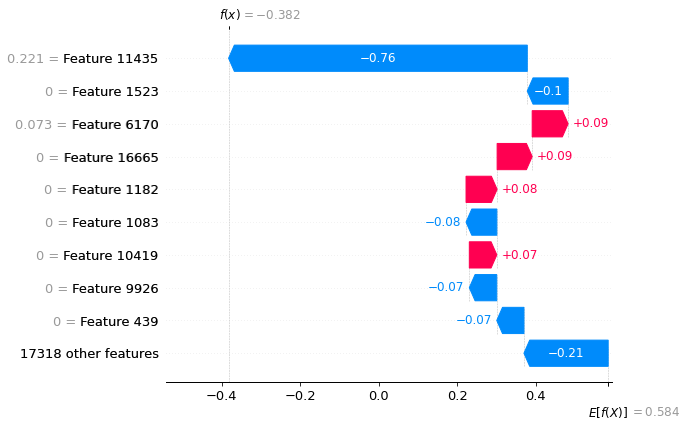

In [ ]:
shap.plots.waterfall(shap_values[0])

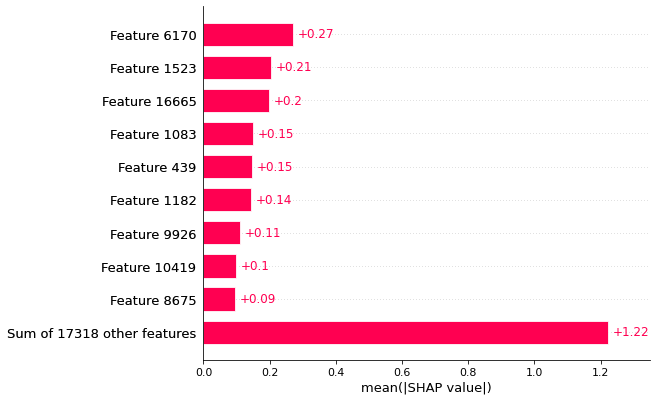

In [ ]:
shap.plots.bar(shap_values)

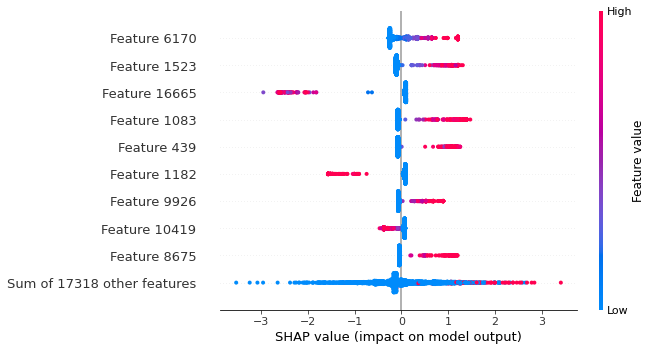

In [ ]:

shap.plots.beeswarm(shap_values)